# Analiza eksploracyjna danych przygotowanych

Analiza przetworzonych danych ze slice'ami pacjentów (pliki .npy)

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Wczytanie struktury danych

In [10]:
prepared_data_dir = Path('../data/prepared')

# Znajdź wszystkich pacjentów
patient_dirs = sorted([d for d in prepared_data_dir.iterdir() 
                       if d.is_dir() and d.name.startswith('person_')])

print(f"Znaleziono {len(patient_dirs)} pacjentów")
print(f"Przykłady: {[d.name for d in patient_dirs]}")

# Kategorie danych
categories = ['background_only', 'liver', 'liver_tumor', 'tumor']
print(f"\nKategorie: {categories}")

Znaleziono 47 pacjentów
Przykłady: ['person_0', 'person_1', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15', 'person_16', 'person_17', 'person_18', 'person_19', 'person_2', 'person_20', 'person_21', 'person_22', 'person_23', 'person_24', 'person_25', 'person_26', 'person_27', 'person_28', 'person_29', 'person_3', 'person_30', 'person_31', 'person_32', 'person_33', 'person_34', 'person_35', 'person_36', 'person_37', 'person_38', 'person_39', 'person_4', 'person_40', 'person_41', 'person_42', 'person_43', 'person_44', 'person_45', 'person_46', 'person_47', 'person_48', 'person_49', 'person_5', 'person_50']

Kategorie: ['background_only', 'liver', 'liver_tumor', 'tumor']


## 2. Zliczanie slice'ów per pacjent i kategoria

In [11]:
# Zlicz slice'y dla każdego pacjenta
patient_stats = []

for patient_dir in patient_dirs:
    patient_name = patient_dir.name
    stats = {'patient': patient_name}
    
    for category in categories:
        ct_dir = patient_dir / category / 'ct'
        if ct_dir.exists():
            num_slices = len(list(ct_dir.glob('*.npy')))
            stats[category] = num_slices
        else:
            stats[category] = 0
    
    # Oblicz sumy
    stats['total_slices'] = sum([stats[cat] for cat in categories])
    stats['with_cancer'] = stats['tumor'] + stats['liver_tumor']
    stats['without_cancer'] = stats['background_only'] + stats['liver']
    stats['cancer_ratio'] = stats['with_cancer'] / stats['total_slices'] * 100 if stats['total_slices'] > 0 else 0
    
    patient_stats.append(stats)

df = pd.DataFrame(patient_stats)
print(f"Dane zebrane dla {len(df)} pacjentów\n")
print(df.head(10))

Dane zebrane dla 47 pacjentów

     patient  background_only  liver  liver_tumor  tumor  total_slices  \
0   person_0               46     13           16      0            75   
1   person_1               94     11           17      1           123   
2  person_10              320    100           81      0           501   
3  person_11              299    114           53      0           466   
4  person_12              266    180            9      0           455   
5  person_13              463     79           63      0           605   
6  person_14              449    123           16      0           588   
7  person_15              432    121           12      0           565   
8  person_16              502     67          120      0           689   
9  person_17              628    145           53      0           826   

   with_cancer  without_cancer  cancer_ratio  
0           16              59     21.333333  
1           18             105     14.634146  
2           8

## 3. Rozkład liczby fragmentów obrazu (histogram) na pacjenta

/tmp/ipykernel_26718/3372077666.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(box_data, labels=['Background', 'Liver', 'Liver+Tumor', 'Tumor'])


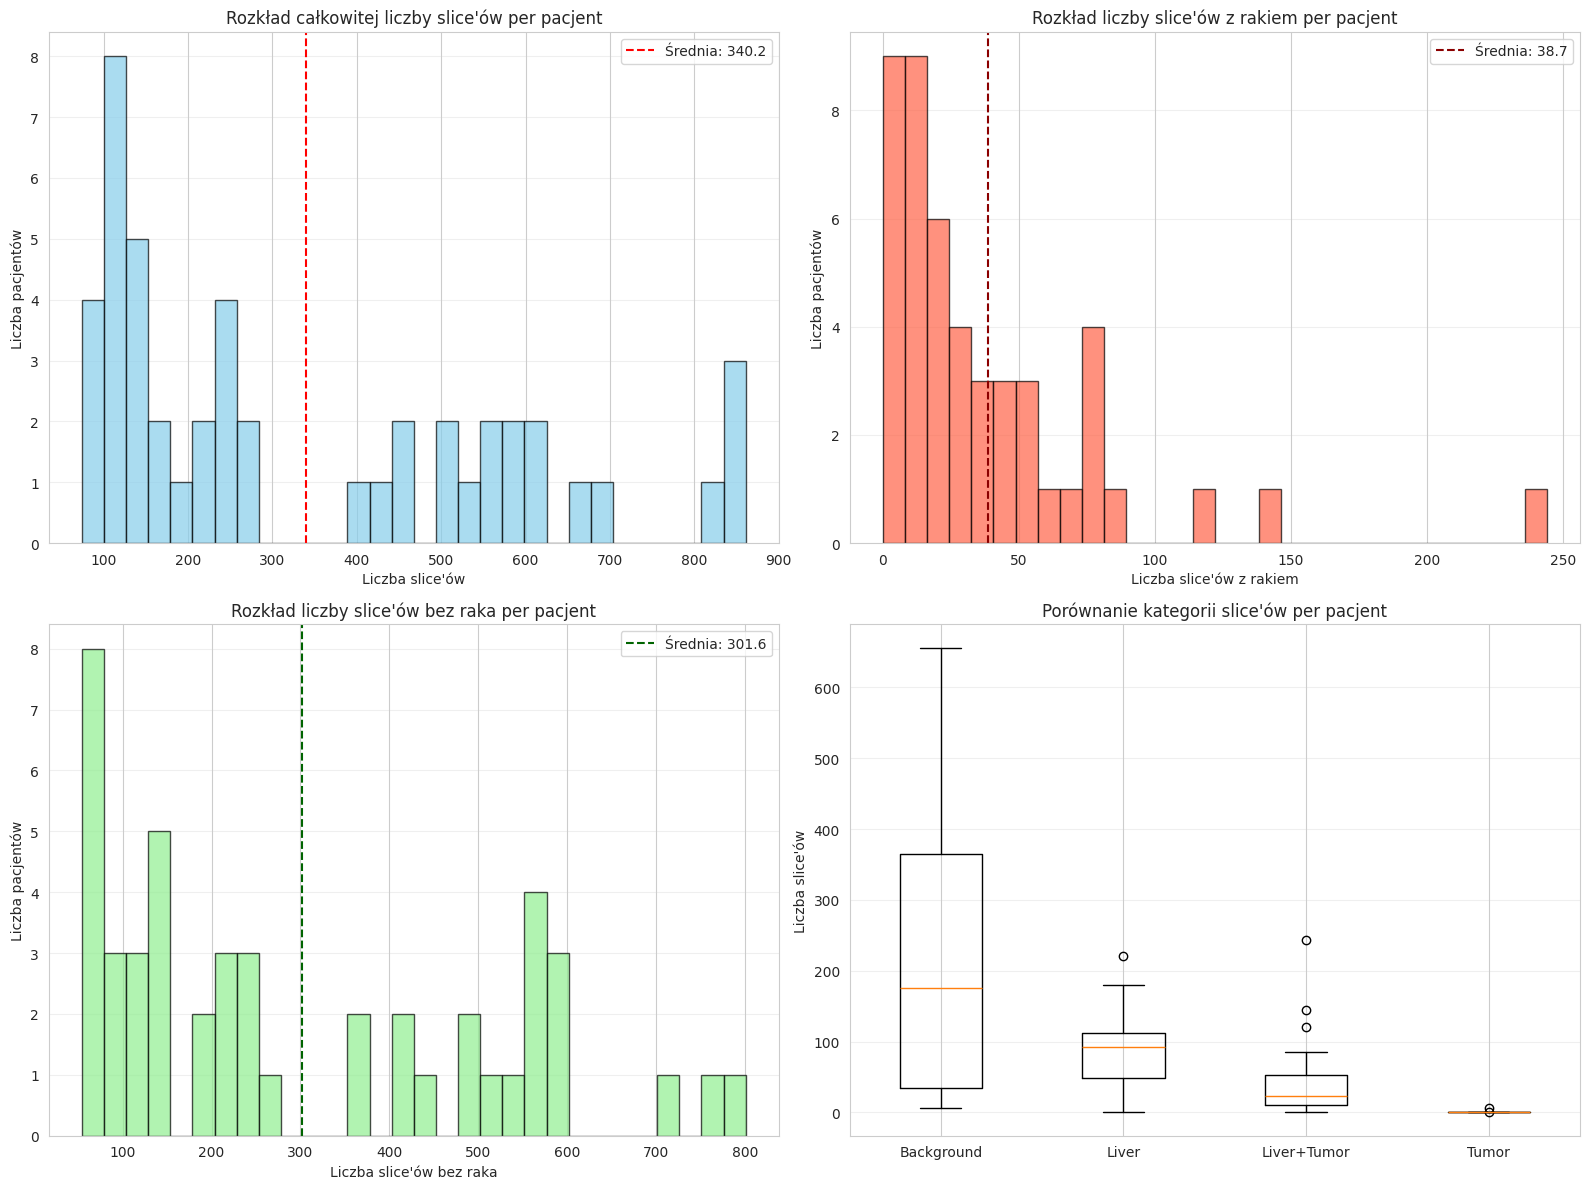

Statystyki opisowe liczby slice'ów per pacjent:
       total_slices  with_cancer  without_cancer
count     47.000000    47.000000       47.000000
mean     340.234043    38.659574      301.574468
std      244.075114    44.418600      223.467024
min       74.000000     0.000000       54.000000
25%      127.000000    11.000000      109.000000
50%      244.000000    23.000000      227.000000
75%      542.000000    53.000000      512.500000
max      861.000000   244.000000      801.000000


In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram: liczba wszystkich slice'ów per pacjent
axes[0, 0].hist(df['total_slices'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Liczba slice\'ów')
axes[0, 0].set_ylabel('Liczba pacjentów')
axes[0, 0].set_title(f'Rozkład całkowitej liczby slice\'ów per pacjent')
axes[0, 0].axvline(df['total_slices'].mean(), color='red', linestyle='--', 
                   label=f'Średnia: {df["total_slices"].mean():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Histogram: slice'y z rakiem per pacjent
axes[0, 1].hist(df['with_cancer'], bins=30, edgecolor='black', alpha=0.7, color='tomato')
axes[0, 1].set_xlabel('Liczba slice\'ów z rakiem')
axes[0, 1].set_ylabel('Liczba pacjentów')
axes[0, 1].set_title('Rozkład liczby slice\'ów z rakiem per pacjent')
axes[0, 1].axvline(df['with_cancer'].mean(), color='darkred', linestyle='--',
                   label=f'Średnia: {df["with_cancer"].mean():.1f}')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Histogram: slice'y bez raka per pacjent
axes[1, 0].hist(df['without_cancer'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Liczba slice\'ów bez raka')
axes[1, 0].set_ylabel('Liczba pacjentów')
axes[1, 0].set_title('Rozkład liczby slice\'ów bez raka per pacjent')
axes[1, 0].axvline(df['without_cancer'].mean(), color='darkgreen', linestyle='--',
                   label=f'Średnia: {df["without_cancer"].mean():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Boxplot porównawczy
box_data = [df['background_only'], df['liver'], df['liver_tumor'], df['tumor']]
axes[1, 1].boxplot(box_data, labels=['Background', 'Liver', 'Liver+Tumor', 'Tumor'])
axes[1, 1].set_ylabel('Liczba slice\'ów')
axes[1, 1].set_title('Porównanie kategorii slice\'ów per pacjent')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statystyki opisowe
print("Statystyki opisowe liczby slice'ów per pacjent:")
print(df[['total_slices', 'with_cancer', 'without_cancer']].describe())

## 4. Procentowy udział raka u pacjentów

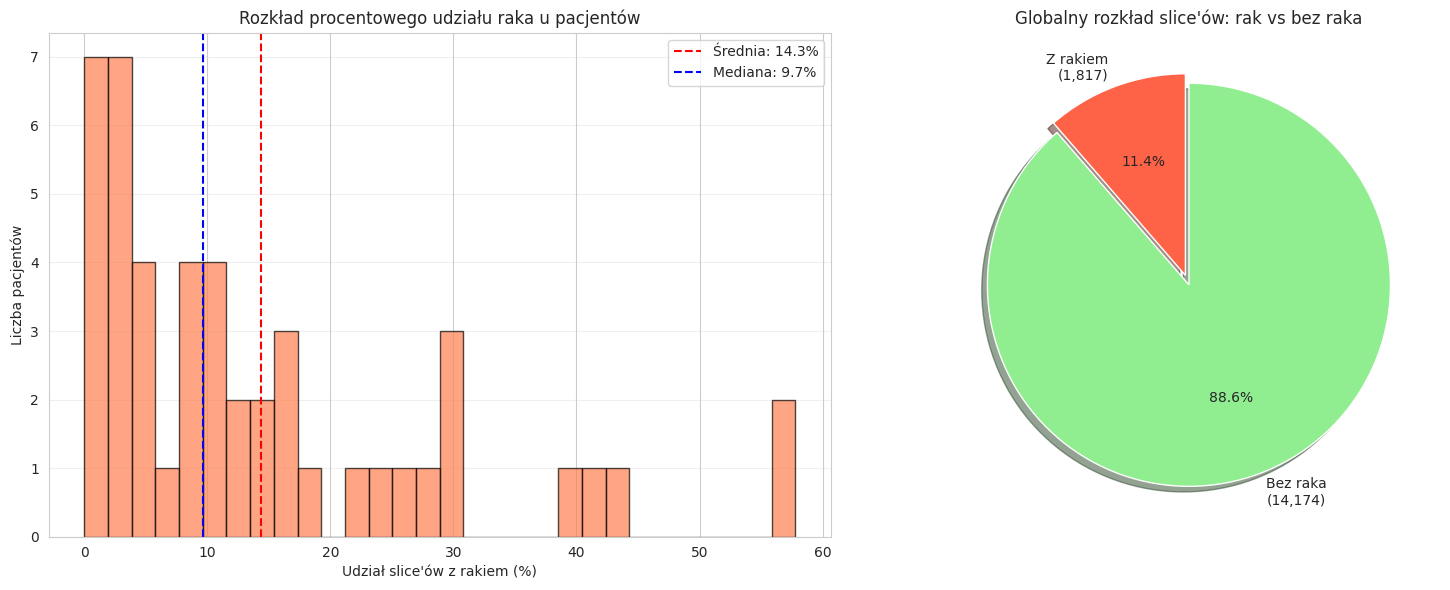

Średni procentowy udział raka per pacjent: 14.34%
Mediana: 9.68%
Odchylenie standardowe: 14.80%

Globalnie:
  Slice'y Z rakiem: 1,817 (11.36%)
  Slice'y BEZ raka: 14,174 (88.64%)


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram: procentowy udział raka per pacjent
axes[0].hist(df['cancer_ratio'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Udział slice\'ów z rakiem (%)')
axes[0].set_ylabel('Liczba pacjentów')
axes[0].set_title('Rozkład procentowego udziału raka u pacjentów')
axes[0].axvline(df['cancer_ratio'].mean(), color='red', linestyle='--',
                label=f'Średnia: {df["cancer_ratio"].mean():.1f}%')
axes[0].axvline(df['cancer_ratio'].median(), color='blue', linestyle='--',
                label=f'Mediana: {df["cancer_ratio"].median():.1f}%')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Wykres kołowy: globalna proporcja
total_with_cancer = df['with_cancer'].sum()
total_without_cancer = df['without_cancer'].sum()

labels = [f'Z rakiem\n({total_with_cancer:,})', f'Bez raka\n({total_without_cancer:,})']
sizes = [total_with_cancer, total_without_cancer]
colors = ['tomato', 'lightgreen']
explode = (0.05, 0)

axes[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[1].set_title('Globalny rozkład slice\'ów: rak vs bez raka')

plt.tight_layout()
plt.show()

print(f"Średni procentowy udział raka per pacjent: {df['cancer_ratio'].mean():.2f}%")
print(f"Mediana: {df['cancer_ratio'].median():.2f}%")
print(f"Odchylenie standardowe: {df['cancer_ratio'].std():.2f}%")
print(f"\nGlobalnie:")
print(f"  Slice'y Z rakiem: {total_with_cancer:,} ({total_with_cancer/(total_with_cancer+total_without_cancer)*100:.2f}%)")
print(f"  Slice'y BEZ raka: {total_without_cancer:,} ({total_without_cancer/(total_with_cancer+total_without_cancer)*100:.2f}%)")

## 5. Liczba zdjęć: 0 (brak raka) vs 1 (rak)

PODSUMOWANIE ETYKIET W ZBIORZE DANYCH

Klasa 0 (bez raka): 14,174 slice'ów
  - background_only: 10,103
  - liver: 4,071

Klasa 1 (z rakiem): 1,817 slice'ów
  - liver_tumor: 1,810
  - tumor: 7

Razem: 15,991 slice'ów

Balans klas:
  Klasa 0: 88.64%
  Klasa 1: 11.36%

Współczynnik nierównowagi: 7.80:1


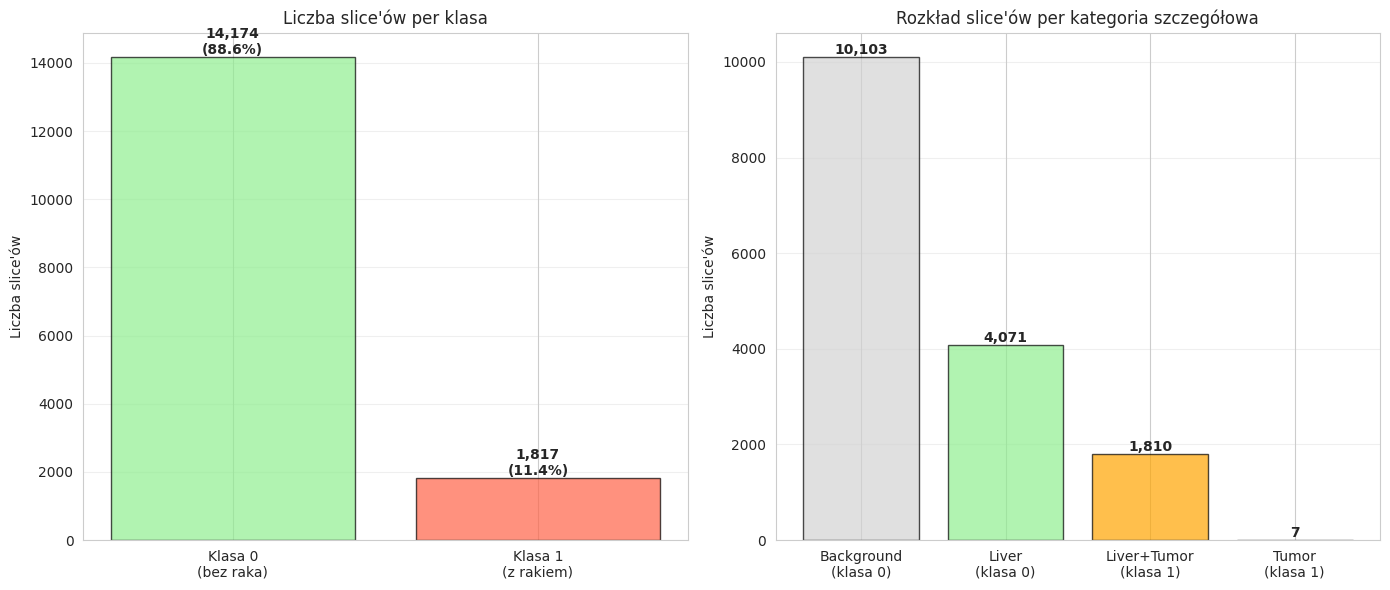

In [14]:
# Sumuj wszystkie slice'y
total_class_0 = df['without_cancer'].sum()  # Brak raka (background_only + liver)
total_class_1 = df['with_cancer'].sum()      # Rak (liver_tumor + tumor)

print("="*60)
print("PODSUMOWANIE ETYKIET W ZBIORZE DANYCH")
print("="*60)
print(f"\nKlasa 0 (bez raka): {total_class_0:,} slice'ów")
print(f"  - background_only: {df['background_only'].sum():,}")
print(f"  - liver: {df['liver'].sum():,}")

print(f"\nKlasa 1 (z rakiem): {total_class_1:,} slice'ów")
print(f"  - liver_tumor: {df['liver_tumor'].sum():,}")
print(f"  - tumor: {df['tumor'].sum():,}")

print(f"\nRazem: {total_class_0 + total_class_1:,} slice'ów")
print(f"\nBalans klas:")
print(f"  Klasa 0: {total_class_0/(total_class_0+total_class_1)*100:.2f}%")
print(f"  Klasa 1: {total_class_1/(total_class_0+total_class_1)*100:.2f}%")

imbalance_ratio = max(total_class_0, total_class_1) / min(total_class_0, total_class_1)
print(f"\nWspółczynnik nierównowagi: {imbalance_ratio:.2f}:1")

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Wykres słupkowy
categories_labels = ['Klasa 0\n(bez raka)', 'Klasa 1\n(z rakiem)']
values = [total_class_0, total_class_1]
colors_bar = ['lightgreen', 'tomato']

bars = axes[0].bar(categories_labels, values, color=colors_bar, edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Liczba slice\'ów')
axes[0].set_title('Liczba slice\'ów per klasa')
axes[0].grid(axis='y', alpha=0.3)

# Dodaj wartości na słupkach
for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:,}\n({val/(total_class_0+total_class_1)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold')

# Szczegółowy wykres słupkowy per kategoria
category_counts = [df['background_only'].sum(), df['liver'].sum(), 
                   df['liver_tumor'].sum(), df['tumor'].sum()]
category_labels = ['Background\n(klasa 0)', 'Liver\n(klasa 0)', 
                   'Liver+Tumor\n(klasa 1)', 'Tumor\n(klasa 1)']
category_colors = ['lightgray', 'lightgreen', 'orange', 'tomato']

bars2 = axes[1].bar(category_labels, category_counts, color=category_colors, 
                    edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Liczba slice\'ów')
axes[1].set_title('Rozkład slice\'ów per kategoria szczegółowa')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Dodaj wartości
for bar, val in zip(bars2, category_counts):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:,}',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)

TOP 10 PACJENTÓW Z NAJWIĘKSZYM UDZIAŁEM RAKA
  patient  total_slices  with_cancer  without_cancer  cancer_ratio
person_33           135           78              57     57.777778
person_28           129           74              55     57.364341
person_40           122           54              68     44.262295
person_31            91           37              54     40.659341
person_37           122           48              74     39.344262
person_44           119           36              83     30.252101
person_39           260           76             184     29.230769
 person_4           841          244             597     29.013080
person_36           111           30              81     27.027027
person_46           124           33              91     26.612903

Średni udział raka w tej grupie: 38.15%

TOP 10 PACJENTÓW Z NAJMNIEJSZYM UDZIAŁEM RAKA
  patient  total_slices  with_cancer  without_cancer  cancer_ratio
 person_3           227            0             227      0.000

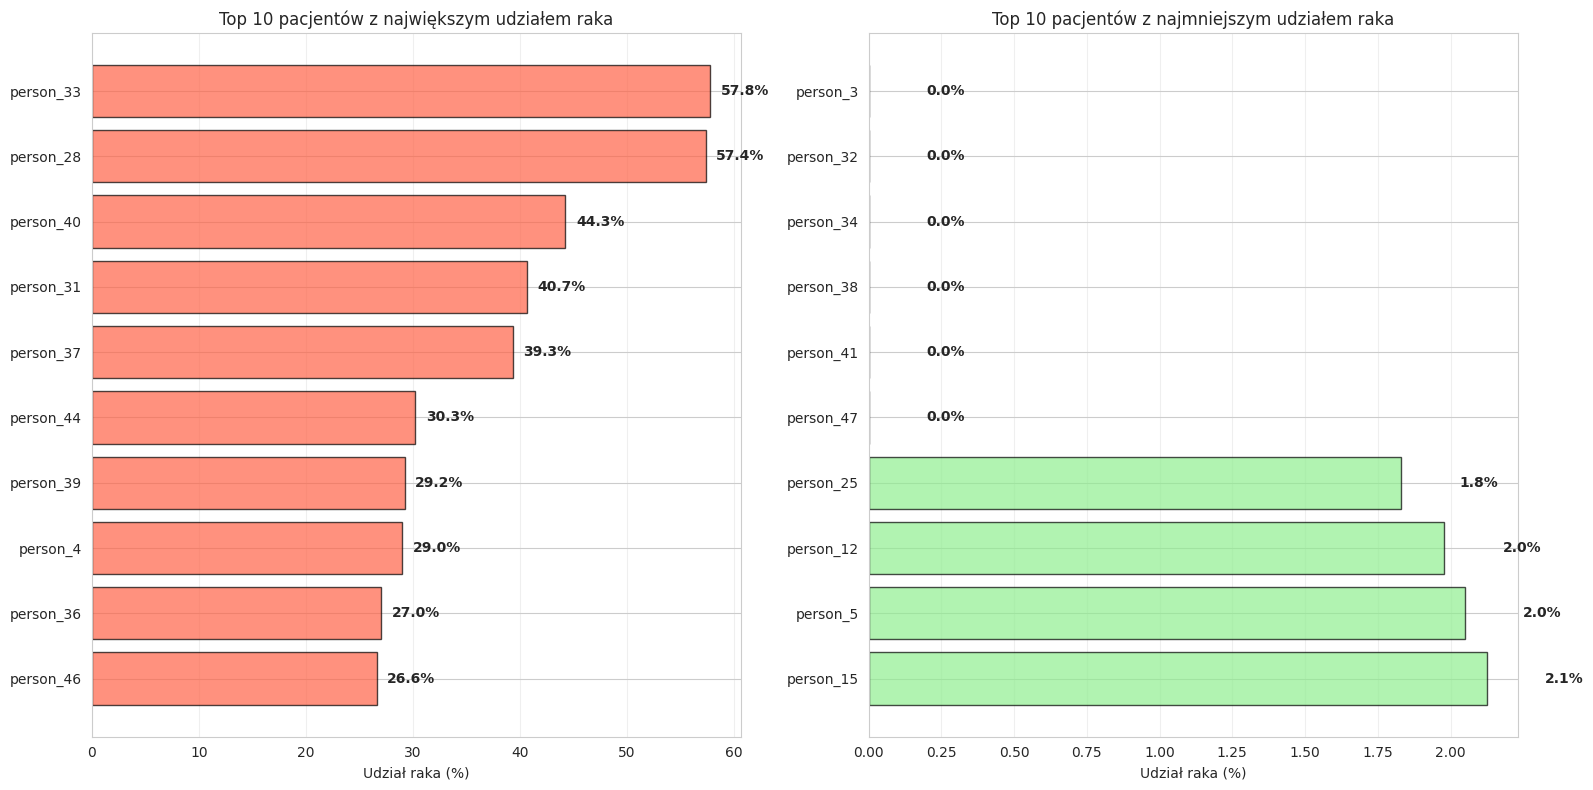


PRZYKŁADOWE SKANY DLA TOP 3 PACJENTÓW Z NAJWIĘKSZYM UDZIAŁEM RAKA

person_33:


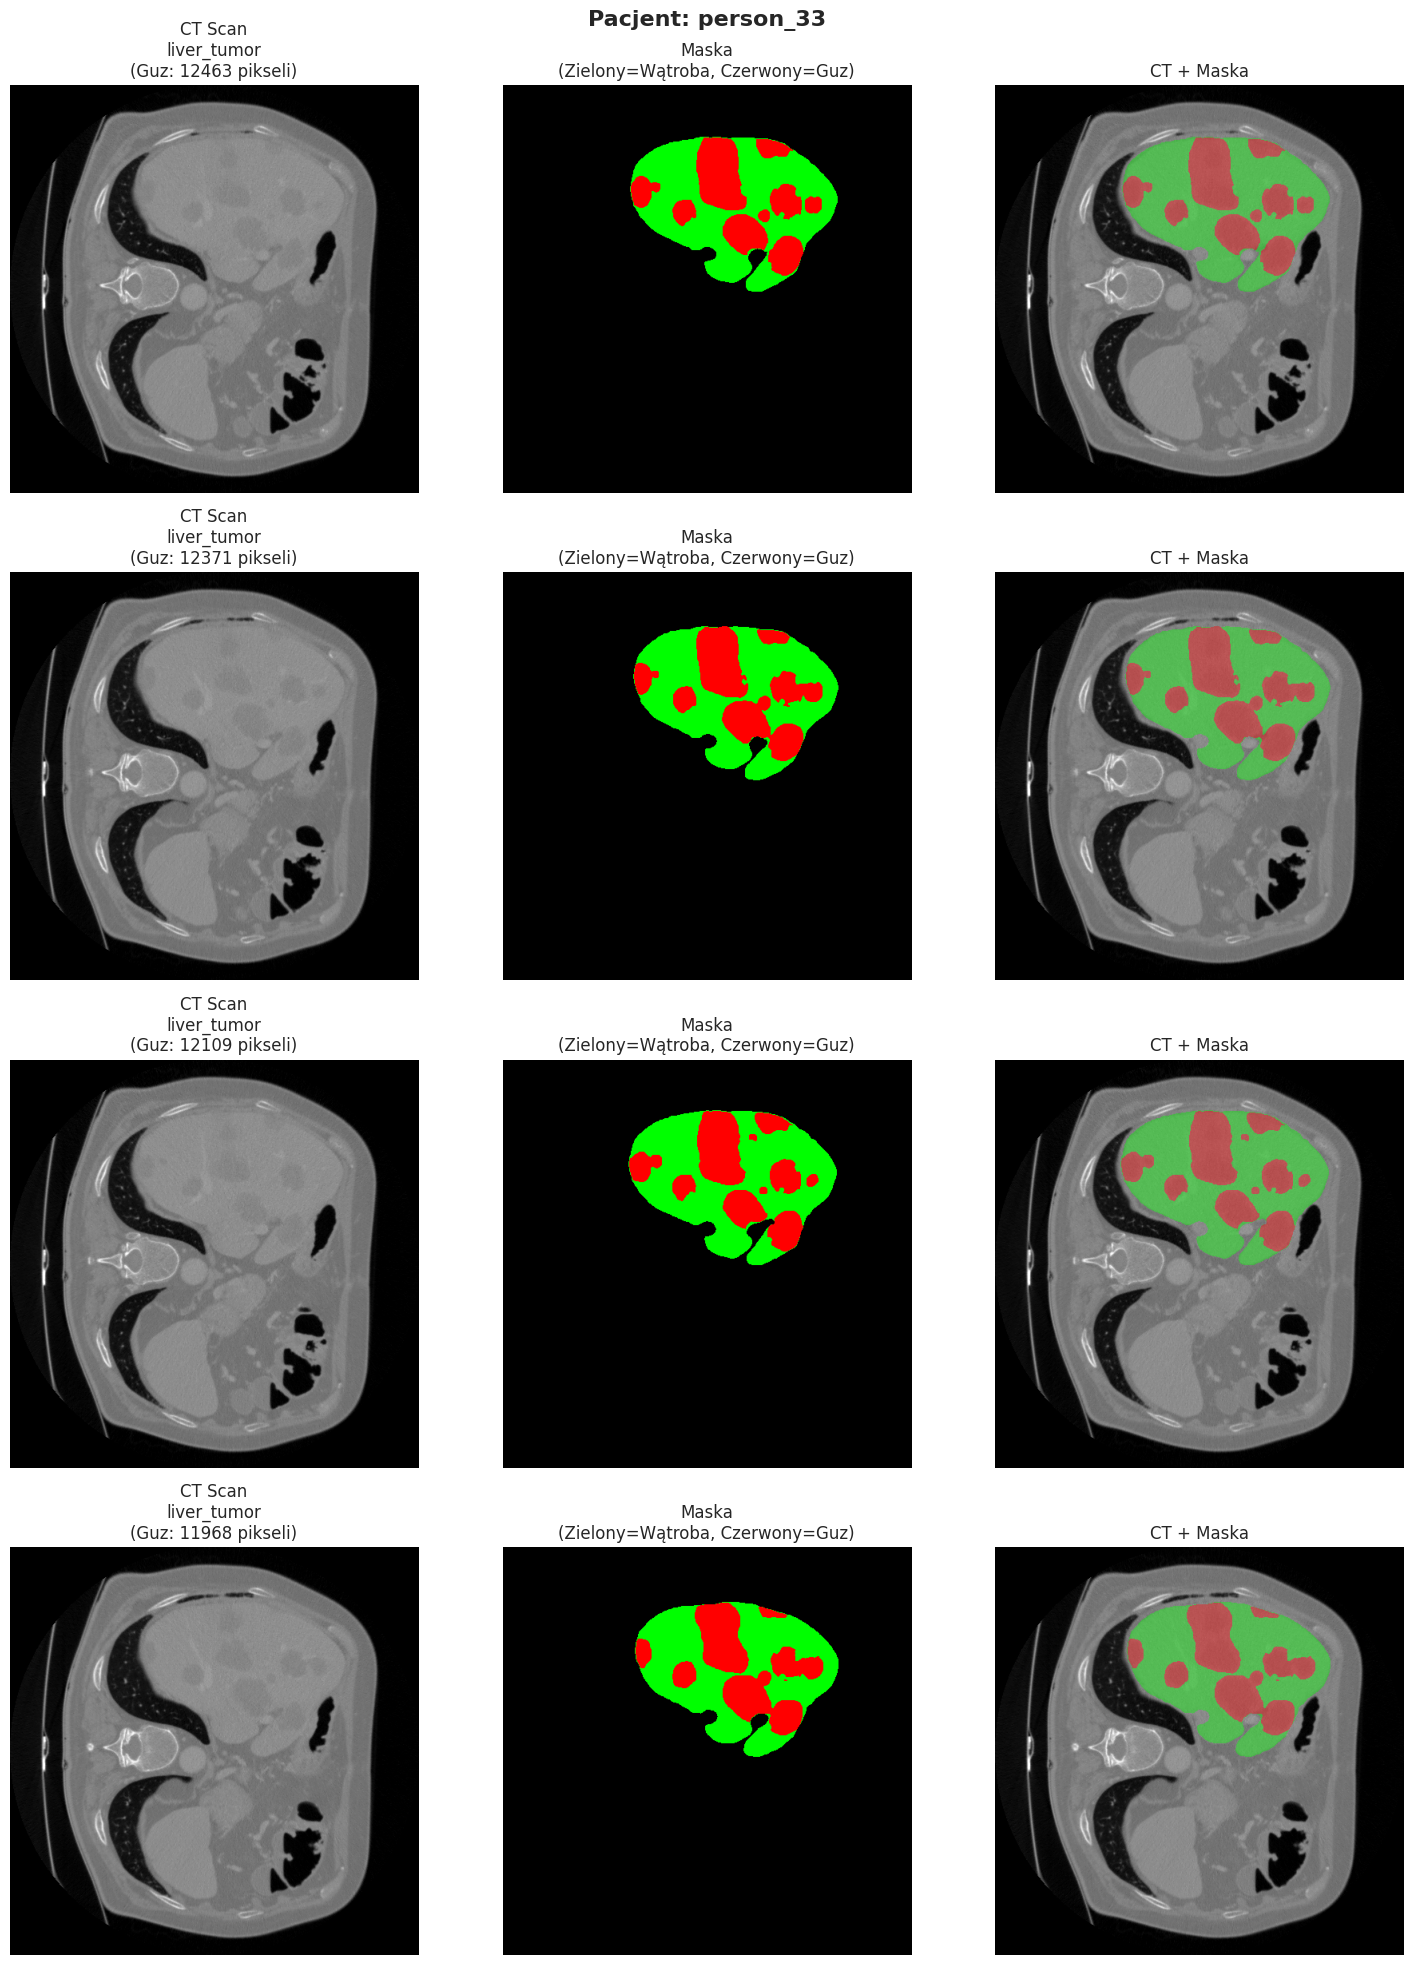


person_28:


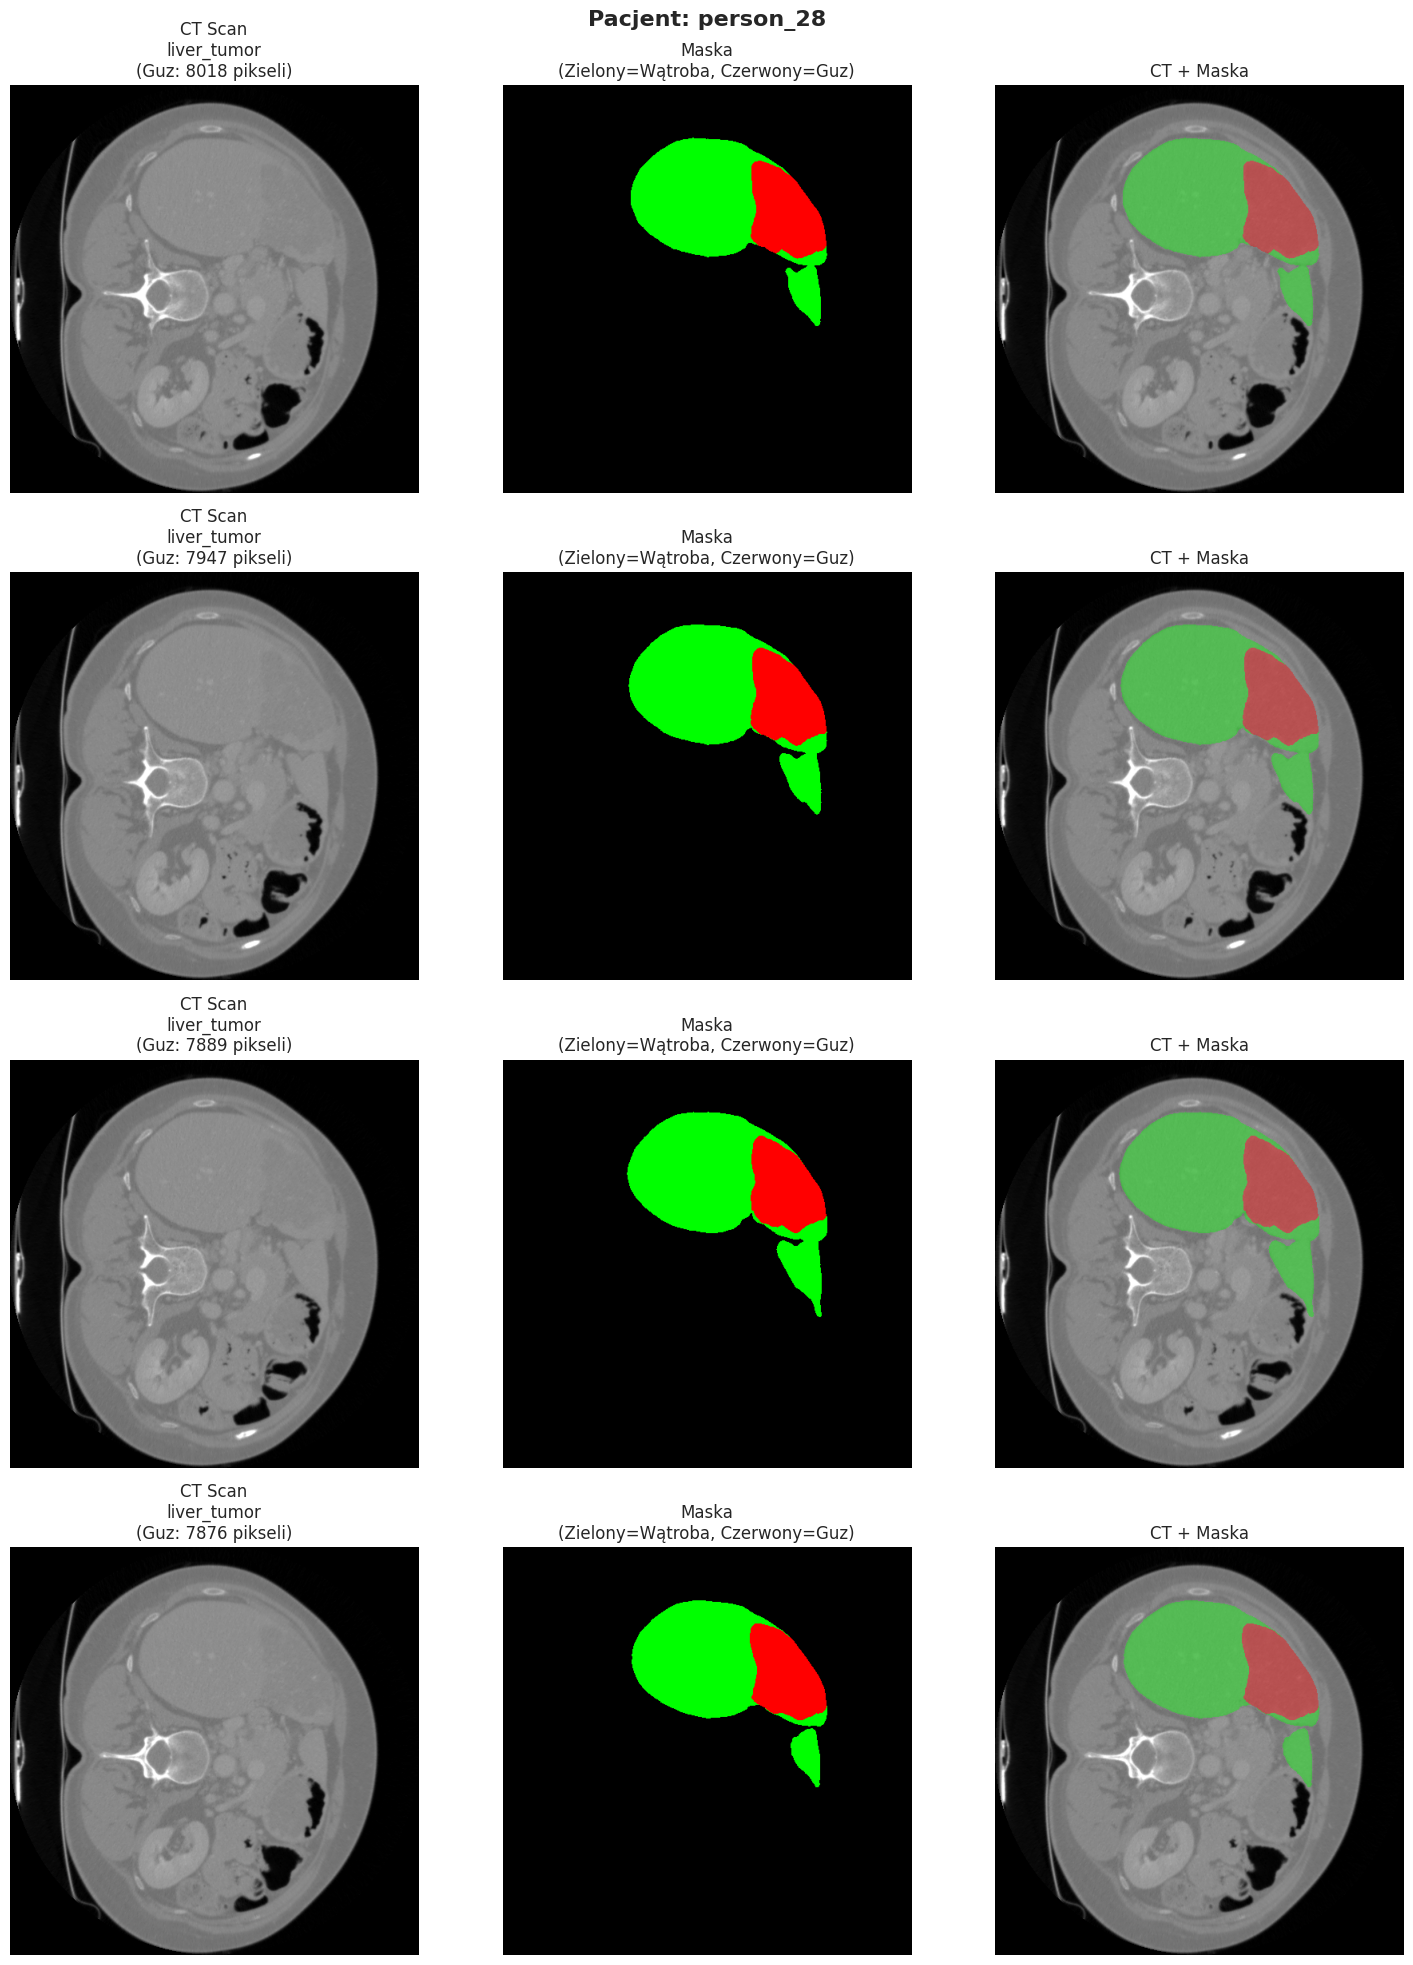


person_40:


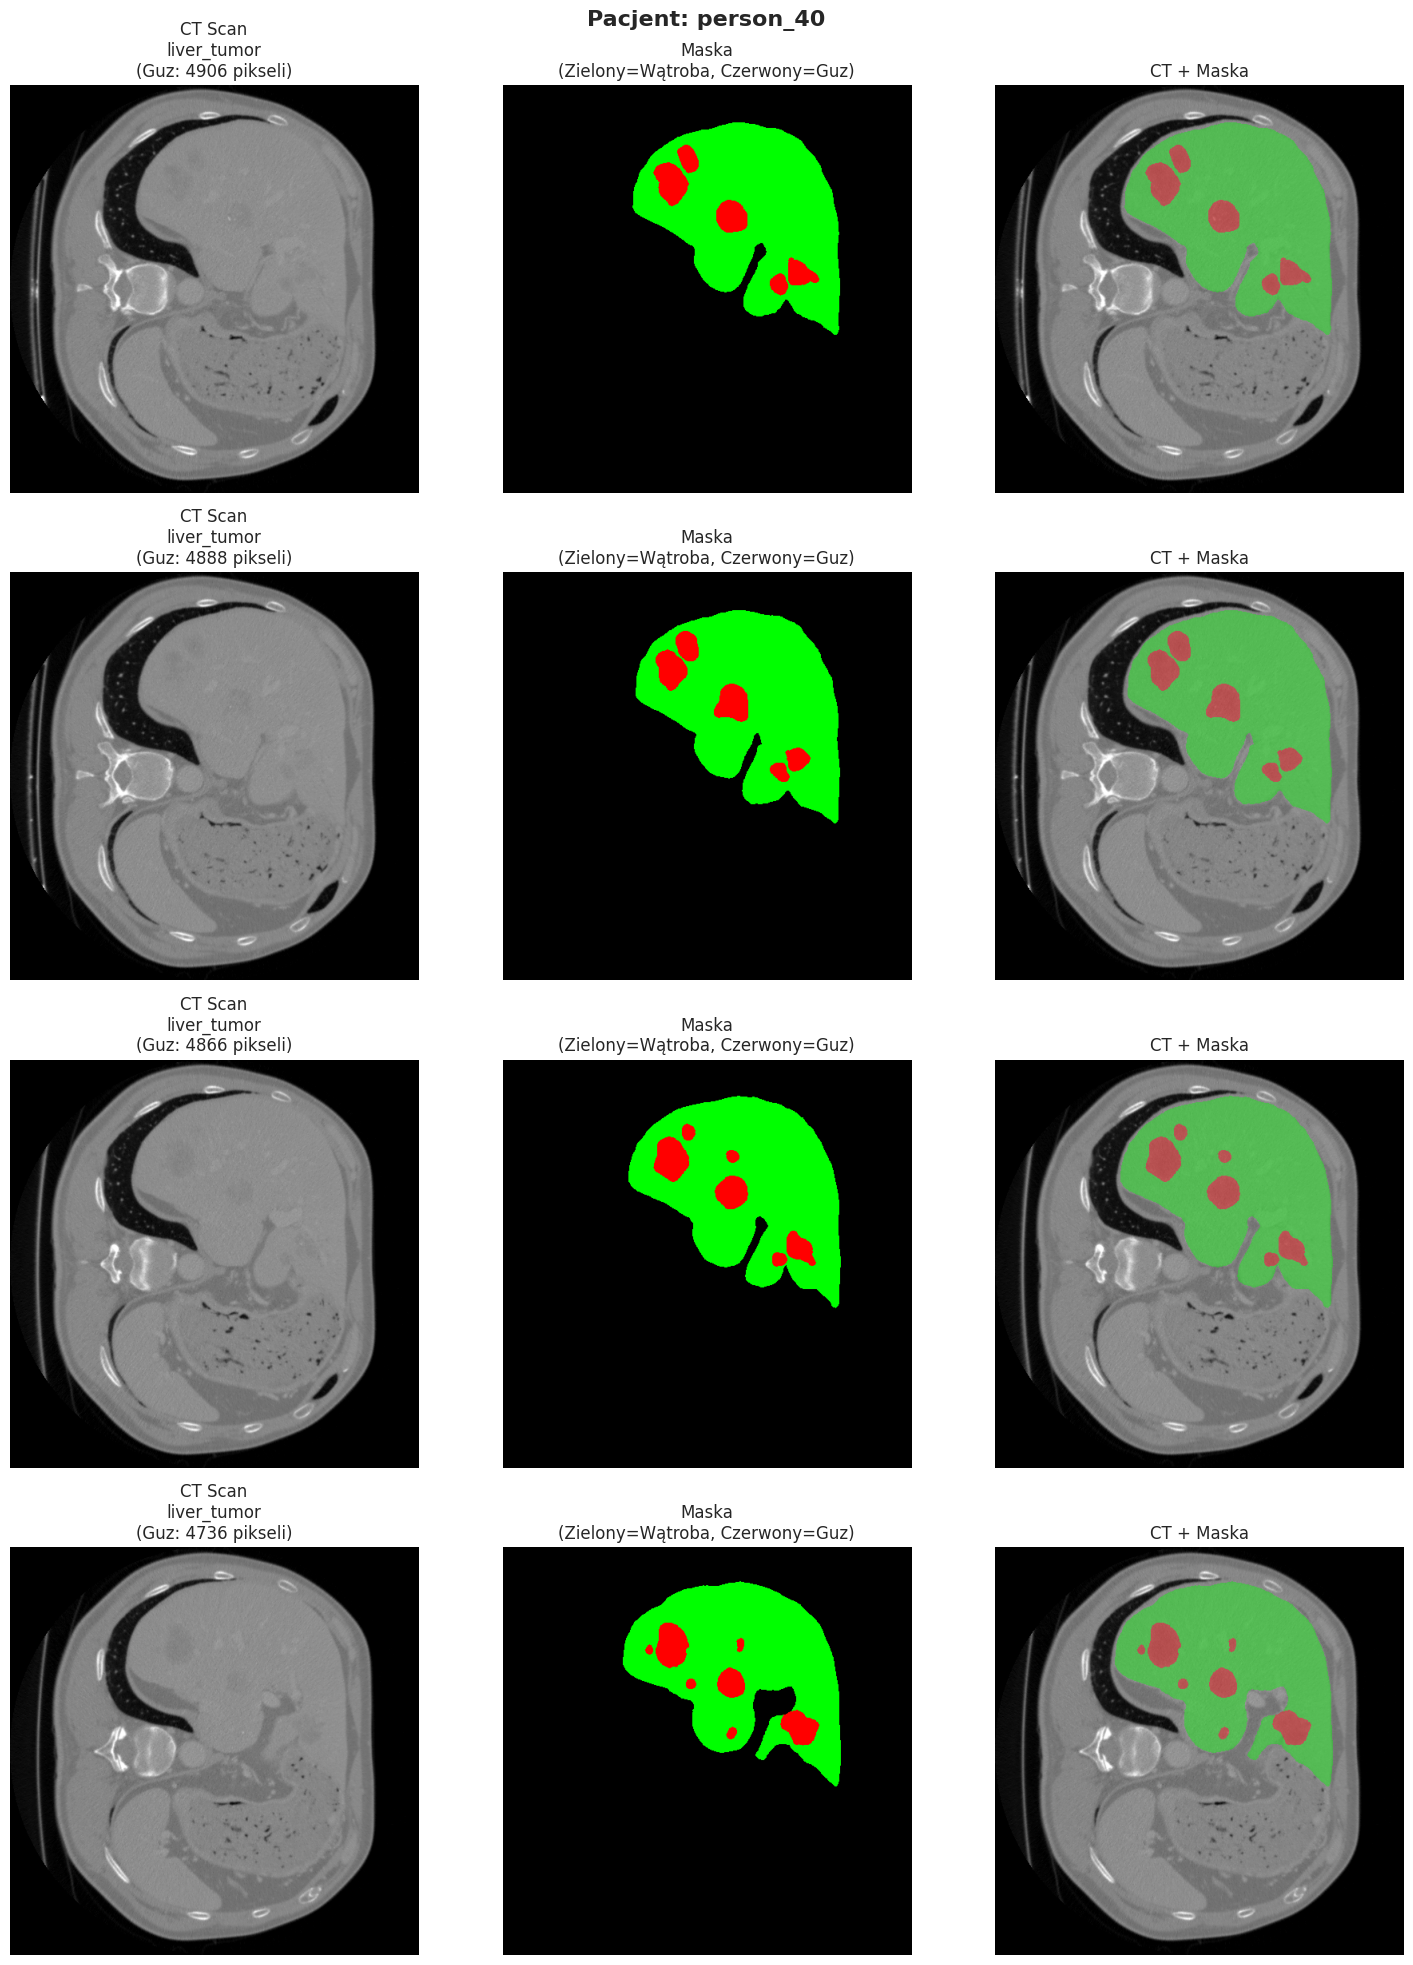

In [17]:
# Top 10 pacjentów z największym udziałem raka
top_10_highest = df.nlargest(10, 'cancer_ratio')[['patient', 'total_slices', 'with_cancer', 'without_cancer', 'cancer_ratio']]
print("="*70)
print("TOP 10 PACJENTÓW Z NAJWIĘKSZYM UDZIAŁEM RAKA")
print("="*70)
print(top_10_highest.to_string(index=False))
print(f"\nŚredni udział raka w tej grupie: {top_10_highest['cancer_ratio'].mean():.2f}%")

print("\n" + "="*70)

# Top 10 pacjentów z najmniejszym udziałem raka
top_10_lowest = df.nsmallest(10, 'cancer_ratio')[['patient', 'total_slices', 'with_cancer', 'without_cancer', 'cancer_ratio']]
print("TOP 10 PACJENTÓW Z NAJMNIEJSZYM UDZIAŁEM RAKA")
print("="*70)
print(top_10_lowest.to_string(index=False))
print(f"\nŚredni udział raka w tej grupie: {top_10_lowest['cancer_ratio'].mean():.2f}%")

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Wykres dla najwyższego udziału
axes[0].barh(top_10_highest['patient'], top_10_highest['cancer_ratio'], color='tomato', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Udział raka (%)')
axes[0].set_title('Top 10 pacjentów z największym udziałem raka')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Dodaj wartości
for i, (patient, ratio) in enumerate(zip(top_10_highest['patient'], top_10_highest['cancer_ratio'])):
    axes[0].text(ratio + 1, i, f'{ratio:.1f}%', va='center', fontweight='bold')

# Wykres dla najniższego udziału
axes[1].barh(top_10_lowest['patient'], top_10_lowest['cancer_ratio'], color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Udział raka (%)')
axes[1].set_title('Top 10 pacjentów z najmniejszym udziałem raka')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

# Dodaj wartości
for i, (patient, ratio) in enumerate(zip(top_10_lowest['patient'], top_10_lowest['cancer_ratio'])):
    axes[1].text(ratio + 0.2, i, f'{ratio:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Funkcja do wizualizacji skanów CT z maskami
def visualize_patient_samples(patient_name, num_samples=3):
    """Wyświetla przykładowe skany CT z nałożonymi maskami dla danego pacjenta - wybiera te z największym pokryciem guza"""
    patient_dir = prepared_data_dir / patient_name
    
    # Zbierz slice'y z różnych kategorii wraz z oceną pokrycia guza
    samples = []
    for category in categories:
        ct_dir = patient_dir / category / 'ct'
        mask_dir = patient_dir / category / 'mask'
        
        if ct_dir.exists() and mask_dir.exists():
            ct_files = sorted(list(ct_dir.glob('*.npy')))
            
            for ct_file in ct_files:
                mask_file = mask_dir / ct_file.name
                
                if mask_file.exists():
                    # Wczytaj maskę i oblicz pokrycie guza
                    mask = np.load(mask_file)
                    tumor_coverage = np.sum(mask == 2)  # Piksel guza = 2
                    
                    samples.append({
                        'category': category,
                        'ct_path': ct_file,
                        'mask_path': mask_file,
                        'tumor_coverage': tumor_coverage
                    })
    
    if len(samples) == 0:
        print(f"Brak danych dla pacjenta {patient_name}")
        return
    
    # Sortuj po pokryciu guza (malejąco) i wybierz top 4
    samples.sort(key=lambda x: x['tumor_coverage'], reverse=True)
    n_samples = min(len(samples), 4)
    
    # Wyświetl znalezione próbki
    fig, axes = plt.subplots(n_samples, 3, figsize=(15, 5*n_samples))
    
    if n_samples == 1:
        axes = axes.reshape(1, -1)
    
    for idx, sample in enumerate(samples[:n_samples]):
        # Wczytaj dane
        ct_scan = np.load(sample['ct_path'])
        mask = np.load(sample['mask_path'])
        
        # CT scan
        axes[idx, 0].imshow(ct_scan, cmap='gray')
        axes[idx, 0].set_title(f"CT Scan\n{sample['category']}\n(Guz: {sample['tumor_coverage']} pikseli)")
        axes[idx, 0].axis('off')
        
        # Maska (wątroba=1, guz=2)
        mask_colored = np.zeros((*mask.shape, 3))
        mask_colored[mask == 1] = [0, 1, 0]  # Zielony - wątroba
        mask_colored[mask == 2] = [1, 0, 0]  # Czerwony - guz
        
        axes[idx, 1].imshow(mask_colored)
        axes[idx, 1].set_title(f"Maska\n(Zielony=Wątroba, Czerwony=Guz)")
        axes[idx, 1].axis('off')
        
        # Nałożenie
        overlay = ct_scan.copy()
        overlay = (overlay - overlay.min()) / (overlay.max() - overlay.min())  # Normalizacja
        overlay = np.stack([overlay, overlay, overlay], axis=-1)
        
        # Dodaj kolory masek z przezroczystością
        alpha = 0.4
        overlay[mask == 1] = overlay[mask == 1] * (1-alpha) + np.array([0, 1, 0]) * alpha
        overlay[mask == 2] = overlay[mask == 2] * (1-alpha) + np.array([1, 0, 0]) * alpha
        
        axes[idx, 2].imshow(overlay)
        axes[idx, 2].set_title(f"CT + Maska")
        axes[idx, 2].axis('off')
    
    fig.suptitle(f'Pacjent: {patient_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Wyświetl przykłady dla top 3 pacjentów z największym udziałem raka
print("\n" + "="*70)
print("PRZYKŁADOWE SKANY DLA TOP 3 PACJENTÓW Z NAJWIĘKSZYM UDZIAŁEM RAKA")
print("="*70)

for patient_name in top_10_highest['patient'].head(3):
    print(f"\n{patient_name}:")
    visualize_patient_samples(patient_name)

### 6.1 Rozkład powierzchni guza per slice


/tmp/ipykernel_26718/652051316.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(box_data, labels=['Tumor\n(tylko guz)', 'Liver+Tumor\n(guz + wątroba)'])


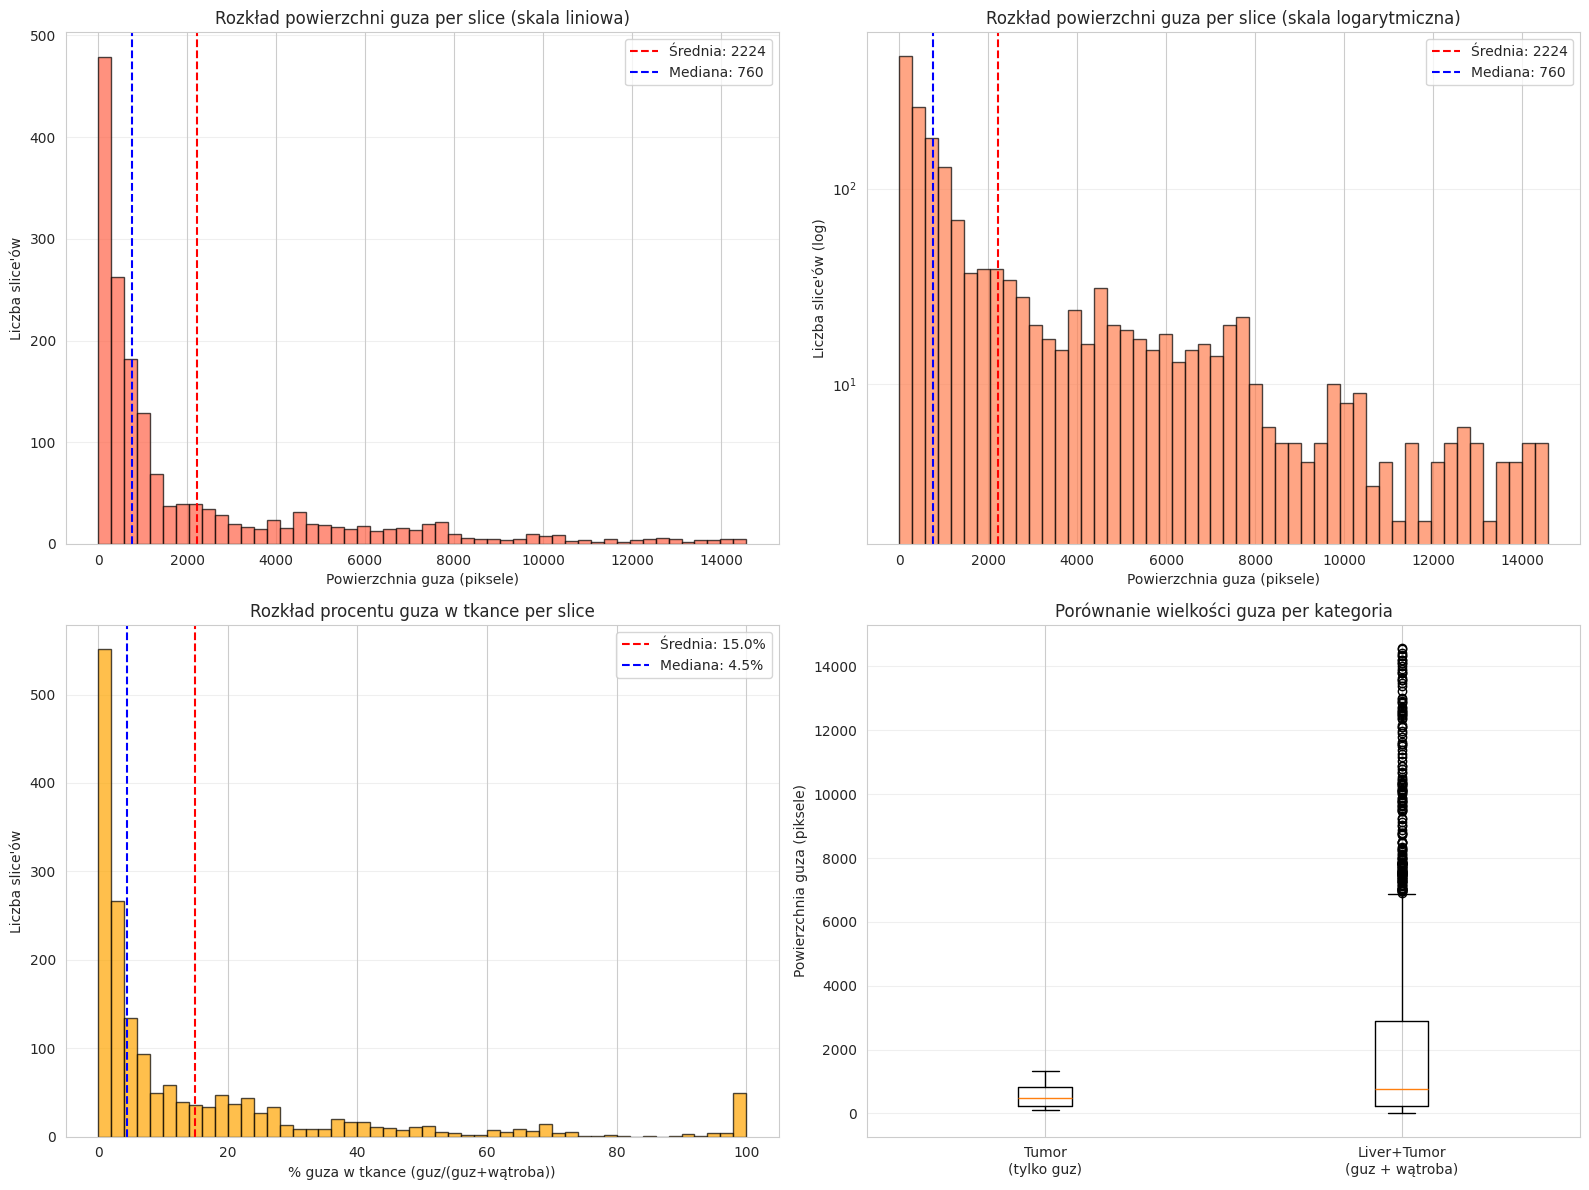

STATYSTYKI POWIERZCHNI GUZA PER SLICE
count     1728.000000
mean      2223.895833
std       3099.725613
min          1.000000
25%        243.750000
50%        760.000000
75%       2889.250000
max      14568.000000
Name: tumor_pixels, dtype: float64

Procentyle:
  10%: 68 pikseli
  25%: 244 pikseli
  50%: 760 pikseli
  75%: 2889 pikseli
  90%: 7019 pikseli
  95%: 9482 pikseli
  99%: 13464 pikseli

⚠️  Małe guzy (<100 pikseli): 232 slice'ów (13.4%)
⚠️  Bardzo małe guzy (<50 pikseli): 129 slice'ów (7.5%)



In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram powierzchni guza (LINEAR SCALE)
axes[0, 0].hist(df_tumor['tumor_pixels'], bins=50, edgecolor='black', alpha=0.7, color='tomato')
axes[0, 0].set_xlabel('Powierzchnia guza (piksele)')
axes[0, 0].set_ylabel('Liczba slice\'ów')
axes[0, 0].set_title('Rozkład powierzchni guza per slice (skala liniowa)')
axes[0, 0].axvline(df_tumor['tumor_pixels'].mean(), color='red', linestyle='--',
                   label=f'Średnia: {df_tumor["tumor_pixels"].mean():.0f}')
axes[0, 0].axvline(df_tumor['tumor_pixels'].median(), color='blue', linestyle='--',
                   label=f'Mediana: {df_tumor["tumor_pixels"].median():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Histogram powierzchni guza (LOG SCALE) - kluczowy dla outlierów
axes[0, 1].hist(df_tumor['tumor_pixels'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Powierzchnia guza (piksele)')
axes[0, 1].set_ylabel('Liczba slice\'ów (log)')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Rozkład powierzchni guza per slice (skala logarytmiczna)')
axes[0, 1].axvline(df_tumor['tumor_pixels'].mean(), color='red', linestyle='--',
                   label=f'Średnia: {df_tumor["tumor_pixels"].mean():.0f}')
axes[0, 1].axvline(df_tumor['tumor_pixels'].median(), color='blue', linestyle='--',
                   label=f'Mediana: {df_tumor["tumor_pixels"].median():.0f}')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Histogram: % guza w stosunku do całej tkanki (guz + wątroba)
axes[1, 0].hist(df_tumor['tumor_percentage'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('% guza w tkance (guz/(guz+wątroba))')
axes[1, 0].set_ylabel('Liczba slice\'ów')
axes[1, 0].set_title('Rozkład procentu guza w tkance per slice')
axes[1, 0].axvline(df_tumor['tumor_percentage'].mean(), color='red', linestyle='--',
                   label=f'Średnia: {df_tumor["tumor_percentage"].mean():.1f}%')
axes[1, 0].axvline(df_tumor['tumor_percentage'].median(), color='blue', linestyle='--',
                   label=f'Mediana: {df_tumor["tumor_percentage"].median():.1f}%')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Boxplot: rozkład powierzchni guza per kategoria
box_data = [
    df_tumor[df_tumor['category'] == 'tumor']['tumor_pixels'],
    df_tumor[df_tumor['category'] == 'liver_tumor']['tumor_pixels']
]
axes[1, 1].boxplot(box_data, labels=['Tumor\n(tylko guz)', 'Liver+Tumor\n(guz + wątroba)'])
axes[1, 1].set_ylabel('Powierzchnia guza (piksele)')
axes[1, 1].set_title('Porównanie wielkości guza per kategoria')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statystyki opisowe
print("="*70)
print("STATYSTYKI POWIERZCHNI GUZA PER SLICE")
print("="*70)
print(df_tumor['tumor_pixels'].describe())

print(f"\nProcentyle:")
print(f"  10%: {df_tumor['tumor_pixels'].quantile(0.10):.0f} pikseli")
print(f"  25%: {df_tumor['tumor_pixels'].quantile(0.25):.0f} pikseli")
print(f"  50%: {df_tumor['tumor_pixels'].quantile(0.50):.0f} pikseli")
print(f"  75%: {df_tumor['tumor_pixels'].quantile(0.75):.0f} pikseli")
print(f"  90%: {df_tumor['tumor_pixels'].quantile(0.90):.0f} pikseli")
print(f"  95%: {df_tumor['tumor_pixels'].quantile(0.95):.0f} pikseli")
print(f"  99%: {df_tumor['tumor_pixels'].quantile(0.99):.0f} pikseli")

# Identyfikacja małych guzów
small_tumors = df_tumor[df_tumor['tumor_pixels'] < 100]
print(f"\n⚠️  Małe guzy (<100 pikseli): {len(small_tumors)} slice'ów ({len(small_tumors)/len(df_tumor)*100:.1f}%)")

very_small_tumors = df_tumor[df_tumor['tumor_pixels'] < 50]
print(f"⚠️  Bardzo małe guzy (<50 pikseli): {len(very_small_tumors)} slice'ów ({len(very_small_tumors)/len(df_tumor)*100:.1f}%)")

print("\n" + "="*70)

### 6.2 Objętość guza per pacjent (suma powierzchni po slice'ach)

OBJĘTOŚĆ GUZA PER PACJENT

Top 10 pacjentów z największą objętością guza:
  patient  total_tumor_volume  avg_tumor_per_slice  std_tumor_per_slice  num_slices_with_tumor  avg_tumor_percentage
 person_4             1516253          6214.151639          4276.712121                    244             37.878163
person_33              434721          5573.346154          2990.929004                     78             24.639670
person_16              373122          3109.350000          2990.660697                    120             11.051423
person_39              348986          4591.921053          2667.920682                     76             84.421698
person_28              214268          2895.513514          2708.200809                     74              9.366762
person_27              187743          1303.770833          1045.760918                    144              7.929570
person_44              185990          5166.388889          3351.478687                     36             

/tmp/ipykernel_26718/442911176.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([patient_tumor_volume['total_tumor_volume']],


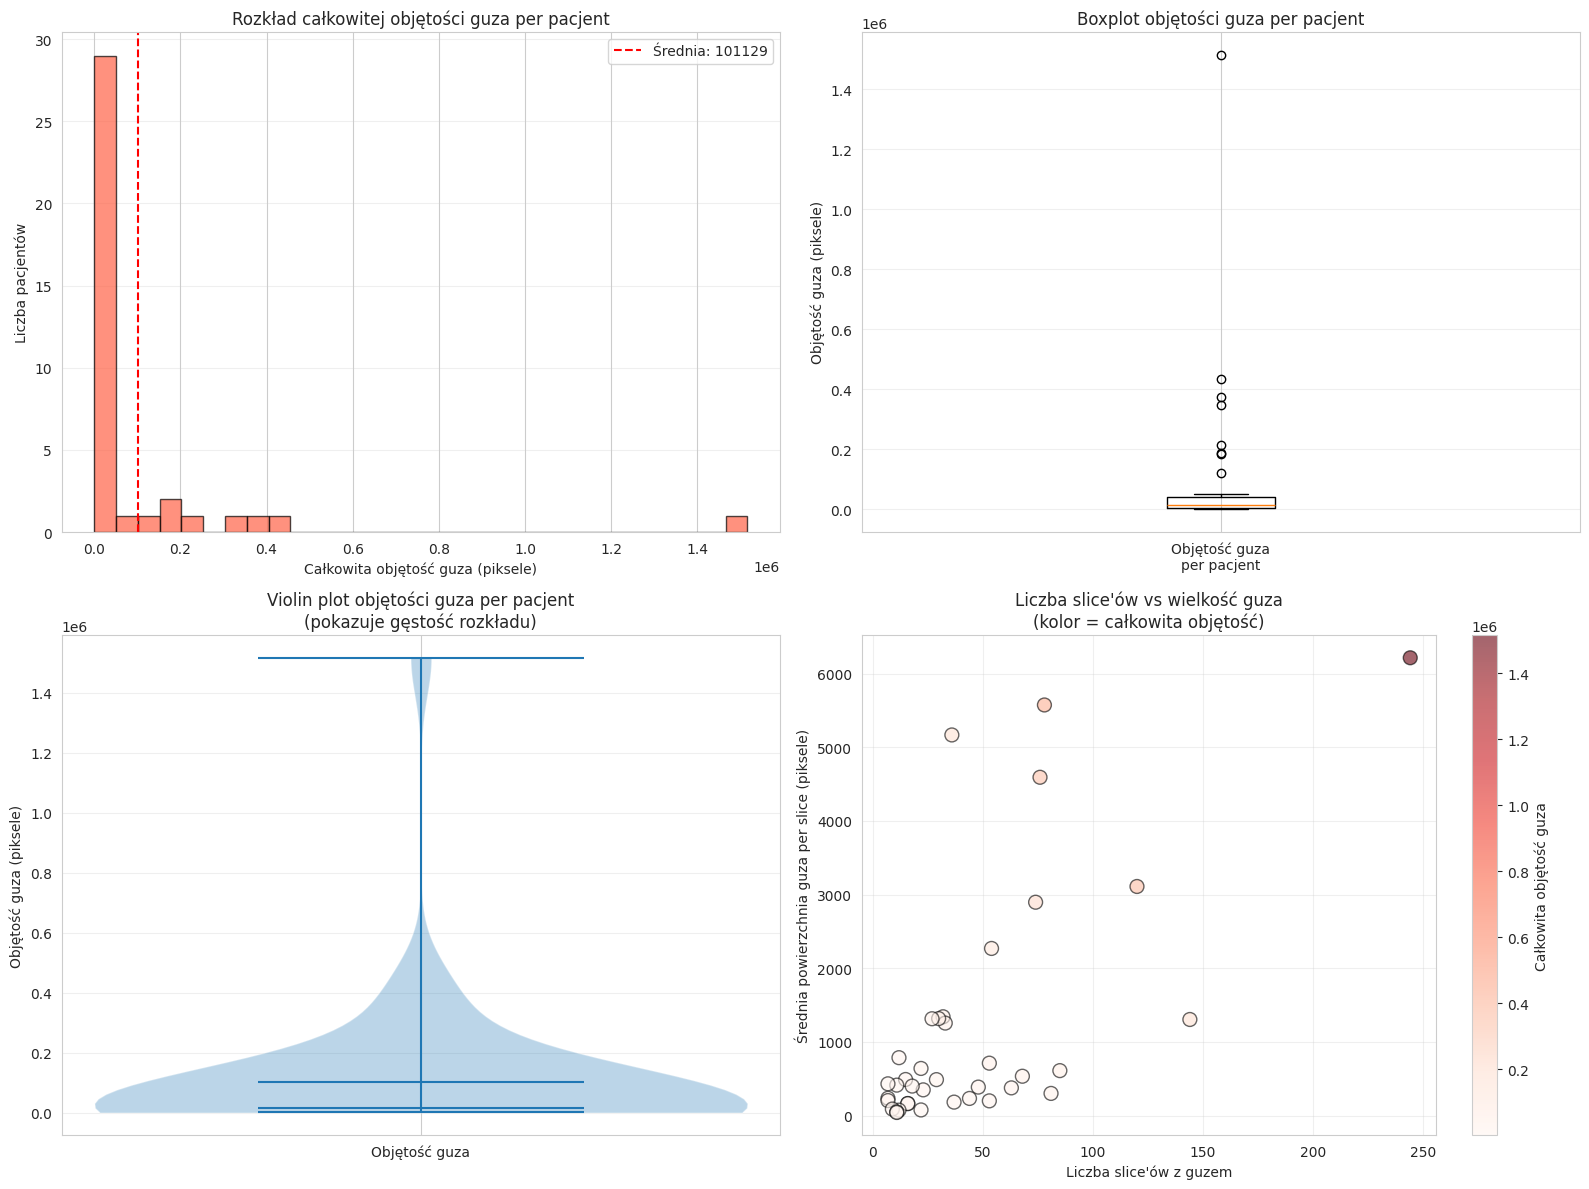

In [24]:
# Oblicz całkowitą objętość guza per pacjent
patient_tumor_volume = df_tumor.groupby('patient').agg({
    'tumor_pixels': ['sum', 'mean', 'std', 'count'],
    'tumor_percentage': 'mean'
}).reset_index()

# Spłaszcz nazwy kolumn
patient_tumor_volume.columns = ['patient', 'total_tumor_volume', 'avg_tumor_per_slice', 
                                 'std_tumor_per_slice', 'num_slices_with_tumor', 
                                 'avg_tumor_percentage']

patient_tumor_volume = patient_tumor_volume.sort_values('total_tumor_volume', ascending=False)

print("="*70)
print("OBJĘTOŚĆ GUZA PER PACJENT")
print("="*70)
print(f"\nTop 10 pacjentów z największą objętością guza:")
print(patient_tumor_volume.head(10).to_string(index=False))

print(f"\n\nStatystyki objętości guza per pacjent:")
print(patient_tumor_volume['total_tumor_volume'].describe())

# Wizualizacja
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram objętości guza per pacjent
axes[0, 0].hist(patient_tumor_volume['total_tumor_volume'], bins=30, 
                edgecolor='black', alpha=0.7, color='tomato')
axes[0, 0].set_xlabel('Całkowita objętość guza (piksele)')
axes[0, 0].set_ylabel('Liczba pacjentów')
axes[0, 0].set_title('Rozkład całkowitej objętości guza per pacjent')
axes[0, 0].axvline(patient_tumor_volume['total_tumor_volume'].mean(), 
                   color='red', linestyle='--',
                   label=f'Średnia: {patient_tumor_volume["total_tumor_volume"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Boxplot objętości guza per pacjent
axes[0, 1].boxplot([patient_tumor_volume['total_tumor_volume']], 
                   labels=['Objętość guza\nper pacjent'])
axes[0, 1].set_ylabel('Objętość guza (piksele)')
axes[0, 1].set_title('Boxplot objętości guza per pacjent')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Violin plot - rozkład z gęstością
parts = axes[1, 0].violinplot([patient_tumor_volume['total_tumor_volume']], 
                              positions=[1], showmeans=True, showmedians=True)
axes[1, 0].set_xticks([1])
axes[1, 0].set_xticklabels(['Objętość guza'])
axes[1, 0].set_ylabel('Objętość guza (piksele)')
axes[1, 0].set_title('Violin plot objętości guza per pacjent\n(pokazuje gęstość rozkładu)')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Liczba slice'ów z guzem vs średnia wielkość guza per slice
scatter = axes[1, 1].scatter(patient_tumor_volume['num_slices_with_tumor'],
                             patient_tumor_volume['avg_tumor_per_slice'],
                             c=patient_tumor_volume['total_tumor_volume'],
                             cmap='Reds', s=100, alpha=0.6, edgecolors='black')
axes[1, 1].set_xlabel('Liczba slice\'ów z guzem')
axes[1, 1].set_ylabel('Średnia powierzchnia guza per slice (piksele)')
axes[1, 1].set_title('Liczba slice\'ów vs wielkość guza\n(kolor = całkowita objętość)')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Całkowita objętość guza')

plt.tight_layout()
plt.show()

print("\n" + "="*70)

### 6.3 Wnioski z analizy wielkości guza


In [26]:
print("="*70)
print("KLUCZOWE WNIOSKI - ANALIZA WIELKOŚCI GUZA")
print("="*70)

# 1. Rozkład wielkości
median_size = df_tumor['tumor_pixels'].median()
mean_size = df_tumor['tumor_pixels'].mean()
print(f"\n1. ROZKŁAD WIELKOŚCI GUZA PER SLICE:")
print(f"   Mediana: {median_size:.0f} pikseli")
print(f"   Średnia: {mean_size:.0f} pikseli")
print(f"   Zakres: {df_tumor['tumor_pixels'].min():.0f} - {df_tumor['tumor_pixels'].max():.0f} pikseli")

# 2. Małe guzy
pct_small = len(df_tumor[df_tumor['tumor_pixels'] < 100]) / len(df_tumor) * 100
pct_very_small = len(df_tumor[df_tumor['tumor_pixels'] < 50]) / len(df_tumor) * 100
print(f"\n2. TRUDNOŚĆ ZADANIA - MAŁE GUZY:")
print(f"   {pct_small:.1f}% slice'ów ma guz <100 pikseli")
print(f"   {pct_very_small:.1f}% slice'ów ma guz <50 pikseli")
if pct_small > 20:
    print(f"   ⚠️  UWAGA: Znaczący odsetek małych guzów!")
    print(f"   💡 Rekomendacja: Użyj focal loss lub uwagi na małe obiekty")

# 3. Procent guza w tkance
avg_pct = df_tumor['tumor_percentage'].mean()
median_pct = df_tumor['tumor_percentage'].median()
print(f"\n3. PROCENT GUZA W TKANCE (guz/(guz+wątroba)):")
print(f"   Średnia: {avg_pct:.2f}%")
print(f"   Mediana: {median_pct:.2f}%")
if avg_pct > 50:
    print(f"   ⚠️  Guz zajmuje >50% tkanki na slice'ach z guzem!")
    print(f"   💡 To oznacza, że gdy guz jest obecny, często dominuje w obrazie")
elif avg_pct < 20:
    print(f"   ⚠️  Guz zajmuje <20% tkanki - małe obiekty!")
    print(f"   💡 Rekomendacja: Focal loss lub weighted loss dla małych guzów")

# 4. Zmienność objętości między pacjentami
cv = patient_tumor_volume['total_tumor_volume'].std() / patient_tumor_volume['total_tumor_volume'].mean()
print(f"\n4. ZMIENNOŚĆ MIĘDZY PACJENTAMI:")
print(f"   Współczynnik zmienności (CV): {cv:.2f}")
print(f"   Min objętość guza: {patient_tumor_volume['total_tumor_volume'].min():.0f} pikseli")
print(f"   Max objętość guza: {patient_tumor_volume['total_tumor_volume'].max():.0f} pikseli")
print(f"   Różnica: {patient_tumor_volume['total_tumor_volume'].max() / patient_tumor_volume['total_tumor_volume'].min():.1f}x")
if cv > 0.5:
    print(f"   ⚠️  Wysoka zmienność między pacjentami!")
    print(f"   💡 Rekomendacja: Normalizacja per pacjent lub augmentacje")

# 5. Outliers
q1 = df_tumor['tumor_pixels'].quantile(0.25)
q3 = df_tumor['tumor_pixels'].quantile(0.75)
iqr = q3 - q1
outliers = df_tumor[(df_tumor['tumor_pixels'] < q1 - 1.5*iqr) | 
                    (df_tumor['tumor_pixels'] > q3 + 1.5*iqr)]
print(f"\n5. OUTLIERS (metoda IQR):")
print(f"   Liczba outliers: {len(outliers)} slice'ów ({len(outliers)/len(df_tumor)*100:.1f}%)")
if len(outliers) > 0:
    print(f"   Wartości outlierów: {outliers['tumor_pixels'].min():.0f} - {outliers['tumor_pixels'].max():.0f} pikseli")
    print(f"   💡 Te skrajne przypadki mogą wpływać na metryki (np. Dice)")

print("\n" + "="*70)
print("PODSUMOWANIE:")
print("="*70)
print(f"✓ Dane zawierają {len(df_tumor)} slice'ów z guzem od {len(patient_tumor_volume)} pacjentów")
print(f"✓ Rozkład wielkości guza jest {('symetryczny' if abs(mean_size - median_size)/mean_size < 0.1 else 'skośny (asymetryczny)')}")

print(f"✓ {'Wykryto znaczący odsetek małych guzów - trudne zadanie!' if pct_small > 20 else 'Rozkład wielkości guza jest umiarkowany'}")
print("="*70)
print(f"✓ Zmienność między pacjentami jest {('niska' if cv < 0.3 else 'umiarkowana' if cv < 0.6 else 'wysoka')}")

KLUCZOWE WNIOSKI - ANALIZA WIELKOŚCI GUZA

1. ROZKŁAD WIELKOŚCI GUZA PER SLICE:
   Mediana: 760 pikseli
   Średnia: 2224 pikseli
   Zakres: 1 - 14568 pikseli

2. TRUDNOŚĆ ZADANIA - MAŁE GUZY:
   13.4% slice'ów ma guz <100 pikseli
   7.5% slice'ów ma guz <50 pikseli

3. PROCENT GUZA W TKANCE (guz/(guz+wątroba)):
   Średnia: 15.03%
   Mediana: 4.49%
   ⚠️  Guz zajmuje <20% tkanki - małe obiekty!
   💡 Rekomendacja: Focal loss lub weighted loss dla małych guzów

4. ZMIENNOŚĆ MIĘDZY PACJENTAMI:
   Współczynnik zmienności (CV): 2.57
   Min objętość guza: 454 pikseli
   Max objętość guza: 1516253 pikseli
   Różnica: 3339.8x
   ⚠️  Wysoka zmienność między pacjentami!
   💡 Rekomendacja: Normalizacja per pacjent lub augmentacje

5. OUTLIERS (metoda IQR):
   Liczba outliers: 181 slice'ów (10.5%)
   Wartości outlierów: 6863 - 14568 pikseli
   💡 Te skrajne przypadki mogą wpływać na metryki (np. Dice)

PODSUMOWANIE:
✓ Dane zawierają 1728 slice'ów z guzem od 38 pacjentów
✓ Rozkład wielkości guza jest

### Sekcja 8: Intensywności CT – guz vs wątroba

ANALIZA INTENSYWNOŚCI CT - GUZ VS WĄTROBA VS TŁO
Wczytywanie losowych próbek do analizy...

✓ Zebrano próbki intensywności:
  - Guz: 112,852 pikseli
  - Wątroba: 892,372 pikseli
  - Tło: 45,000 pikseli

STATYSTYKI INTENSYWNOŚCI (wartości HU)

TUMOR:
  Średnia: 61.85 HU
  Mediana: 59.00 HU
  Odchylenie std: 42.06
  Min: -261.00 HU
  Max: 262.00 HU
  Zakres: 523.00 HU

LIVER:
  Średnia: 97.47 HU
  Mediana: 99.00 HU
  Odchylenie std: 34.96
  Min: -351.00 HU
  Max: 1882.00 HU
  Zakres: 2233.00 HU

BACKGROUND:
  Średnia: -668.74 HU
  Mediana: -913.00 HU
  Odchylenie std: 703.63
  Min: -3024.00 HU
  Max: 3071.00 HU
  Zakres: 6095.00 HU


/tmp/ipykernel_26718/3390999333.py:125: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(box_data, labels=['Tło', 'Wątroba', 'Guz'],


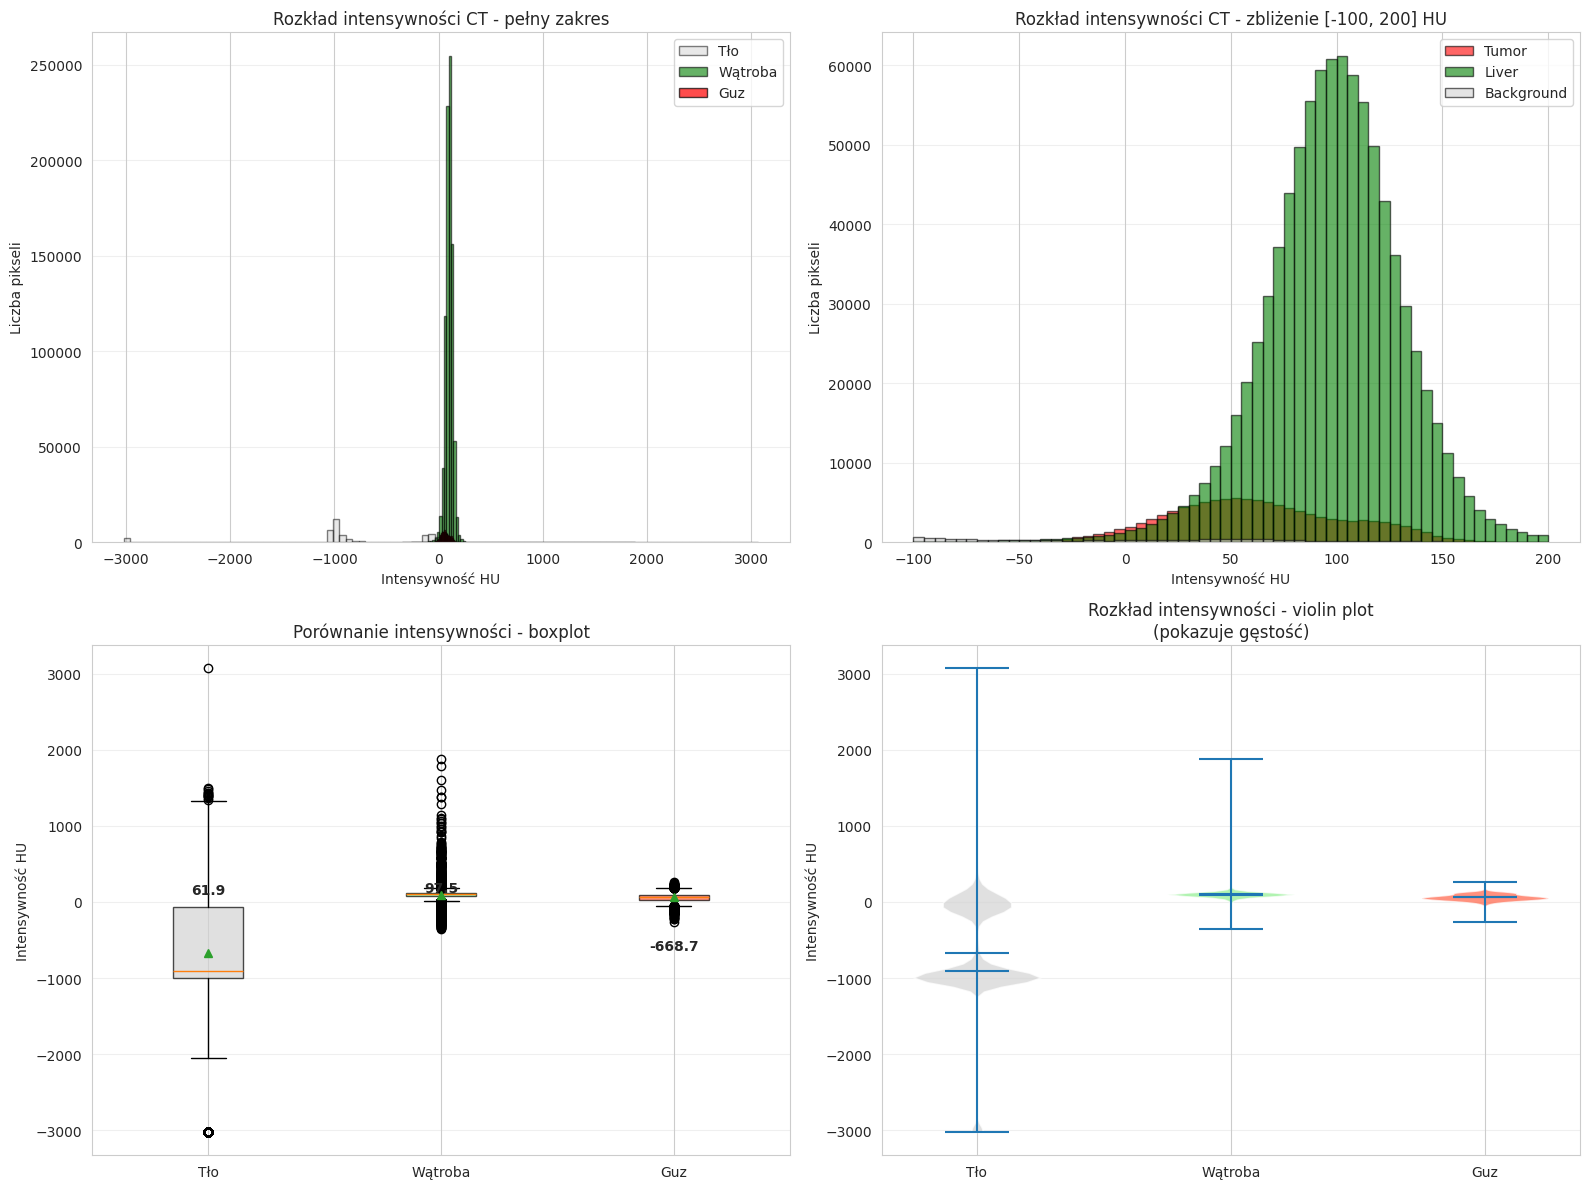


KLUCZOWE WNIOSKI - ANALIZA INTENSYWNOŚCI CT

1. SEPAROWALNOŚĆ KLAS:
   Różnica średnich (Guz - Wątroba): -35.62 HU
   Różnica średnich (Wątroba - Tło): 766.22 HU
   ✓ Guz i wątroba mają wyraźnie różne intensywności (>36 HU)
   💡 Model powinien łatwo rozróżnić guz od wątroby

2. ZAKRES WARTOŚCI:
   Zakres guza: 523 HU
   Zakres wątroby: 2233 HU
   Współczynnik zmienności guza: 0.68
   Współczynnik zmienności wątroby: 0.36

3. PREPROCESSING:
   ✓ Wartości są już w skali HU (Hounsfield Units)
   ✓ Brak ekstremalnych wartości poza zakresem CT



In [28]:
# Analiza intensywności CT - guz vs wątroba vs tło
print("="*70)
print("ANALIZA INTENSYWNOŚCI CT - GUZ VS WĄTROBA VS TŁO")
print("="*70)
print("Wczytywanie losowych próbek do analizy...")

# Zbierz próbki intensywności z różnych kategorii
np.random.seed(42)
n_samples_per_category = 50  # Losowe 50 próbek z każdej kategorii

intensity_data = {
    'tumor': [],
    'liver': [],
    'background': []
}

# Zbierz próbki z kategorii liver_tumor (zarówno guz jak i wątroba)
liver_tumor_samples = df_tumor.sample(n=min(n_samples_per_category, len(df_tumor)))

for _, row in liver_tumor_samples.iterrows():
    patient_dir = prepared_data_dir / row['patient'] / row['category']
    ct_file = patient_dir / 'ct' / row['slice']
    mask_file = patient_dir / 'mask' / row['slice']
    
    if ct_file.exists() and mask_file.exists():
        try:
            ct_scan = np.load(ct_file)
            mask = np.load(mask_file)
            
            # Pobierz intensywności guza (maska == 2)
            tumor_intensities = ct_scan[mask == 2]
            if len(tumor_intensities) > 0:
                intensity_data['tumor'].extend(tumor_intensities.flatten())
            
            # Pobierz intensywności wątroby (maska == 1)
            liver_intensities = ct_scan[mask == 1]
            if len(liver_intensities) > 0:
                intensity_data['liver'].extend(liver_intensities.flatten())
        except (EOFError, ValueError) as e:
            print(f"⚠️  Pominięto uszkodzony plik: {ct_file.name}")
            continue

# Zbierz próbki z kategorii background_only
background_samples = df[df['background_only'] > 0].sample(n=min(n_samples_per_category, len(df[df['background_only'] > 0])))

for _, row in background_samples.iterrows():
    patient_dir = prepared_data_dir / row['patient'] / 'background_only'
    ct_dir = patient_dir / 'ct'
    
    if ct_dir.exists():
        ct_files = list(ct_dir.glob('*.npy'))
        if len(ct_files) > 0:
            # Próbuj załadować pliki dopóki nie znajdziesz prawidłowego
            for _ in range(min(5, len(ct_files))):
                ct_file = np.random.choice(ct_files)
                try:
                    ct_scan = np.load(ct_file)
                    
                    # Pobierz losowe piksele z tła
                    background_intensities = ct_scan.flatten()
                    sampled_bg = np.random.choice(background_intensities, 
                                                 size=min(1000, len(background_intensities)), 
                                                 replace=False)
                    intensity_data['background'].extend(sampled_bg)
                    break  # Sukces - przejdź do następnego pacjenta
                except (EOFError, ValueError):
                    continue  # Spróbuj inny plik

# Konwersja do numpy arrays
for key in intensity_data:
    intensity_data[key] = np.array(intensity_data[key])

print(f"\n✓ Zebrano próbki intensywności:")
print(f"  - Guz: {len(intensity_data['tumor']):,} pikseli")
print(f"  - Wątroba: {len(intensity_data['liver']):,} pikseli")
print(f"  - Tło: {len(intensity_data['background']):,} pikseli")

# Statystyki opisowe
print("\n" + "="*70)
print("STATYSTYKI INTENSYWNOŚCI (wartości HU)")
print("="*70)

for tissue_type, intensities in intensity_data.items():
    if len(intensities) > 0:
        print(f"\n{tissue_type.upper()}:")
        print(f"  Średnia: {intensities.mean():.2f} HU")
        print(f"  Mediana: {np.median(intensities):.2f} HU")
        print(f"  Odchylenie std: {intensities.std():.2f}")
        print(f"  Min: {intensities.min():.2f} HU")
        print(f"  Max: {intensities.max():.2f} HU")
        print(f"  Zakres: {intensities.max() - intensities.min():.2f} HU")

# Wizualizacja (tylko jeśli mamy dane)
if all(len(intensity_data[k]) > 0 for k in intensity_data.keys()):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Histogramy nałożone - pełny zakres
    axes[0, 0].hist(intensity_data['background'], bins=100, alpha=0.5, 
                    label='Tło', color='lightgray', edgecolor='black')
    axes[0, 0].hist(intensity_data['liver'], bins=100, alpha=0.6, 
                    label='Wątroba', color='green', edgecolor='black')
    axes[0, 0].hist(intensity_data['tumor'], bins=100, alpha=0.7, 
                    label='Guz', color='red', edgecolor='black')
    axes[0, 0].set_xlabel('Intensywność HU')
    axes[0, 0].set_ylabel('Liczba pikseli')
    axes[0, 0].set_title('Rozkład intensywności CT - pełny zakres')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)

    # 2. Histogramy nałożone - zbliżenie na zakres [-100, 200] HU
    for tissue_type, intensities in intensity_data.items():
        filtered = intensities[(intensities >= -100) & (intensities <= 200)]
        color = {'background': 'lightgray', 'liver': 'green', 'tumor': 'red'}[tissue_type]
        axes[0, 1].hist(filtered, bins=60, alpha=0.6, 
                       label=tissue_type.capitalize(), color=color, edgecolor='black')

    axes[0, 1].set_xlabel('Intensywność HU')
    axes[0, 1].set_ylabel('Liczba pikseli')
    axes[0, 1].set_title('Rozkład intensywności CT - zbliżenie [-100, 200] HU')
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)

    # 3. Boxplot porównawczy
    box_data = [intensity_data['background'], intensity_data['liver'], intensity_data['tumor']]
    bp = axes[1, 0].boxplot(box_data, labels=['Tło', 'Wątroba', 'Guz'],
                            patch_artist=True, showmeans=True)

    # Kolorowanie boxplotów
    colors = ['lightgray', 'lightgreen', 'tomato']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[1, 0].set_ylabel('Intensywność HU')
    axes[1, 0].set_title('Porównanie intensywności - boxplot')
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Dodaj średnie jako tekst
    for i, (tissue_type, intensities) in enumerate(intensity_data.items(), 1):
        mean_val = intensities.mean()
        axes[1, 0].text(i, mean_val, f'{mean_val:.1f}', 
                       ha='center', va='bottom', fontweight='bold', fontsize=10)

    # 4. Violin plot - pokazuje gęstość rozkładu
    parts = axes[1, 1].violinplot(box_data, positions=[1, 2, 3], 
                                  showmeans=True, showmedians=True)

    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    axes[1, 1].set_xticks([1, 2, 3])
    axes[1, 1].set_xticklabels(['Tło', 'Wątroba', 'Guz'])
    axes[1, 1].set_ylabel('Intensywność HU')
    axes[1, 1].set_title('Rozkład intensywności - violin plot\n(pokazuje gęstość)')
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Wnioski
    print("\n" + "="*70)
    print("KLUCZOWE WNIOSKI - ANALIZA INTENSYWNOŚCI CT")
    print("="*70)

    tumor_mean = intensity_data['tumor'].mean()
    liver_mean = intensity_data['liver'].mean()
    bg_mean = intensity_data['background'].mean()

    print(f"\n1. SEPAROWALNOŚĆ KLAS:")
    print(f"   Różnica średnich (Guz - Wątroba): {tumor_mean - liver_mean:.2f} HU")
    print(f"   Różnica średnich (Wątroba - Tło): {liver_mean - bg_mean:.2f} HU")

    if abs(tumor_mean - liver_mean) > 20:
        print(f"   ✓ Guz i wątroba mają wyraźnie różne intensywności (>{abs(tumor_mean - liver_mean):.0f} HU)")
        print(f"   💡 Model powinien łatwo rozróżnić guz od wątroby")
    elif abs(tumor_mean - liver_mean) > 10:
        print(f"   ⚠️  Guz i wątroba mają umiarkowanie różne intensywności ({abs(tumor_mean - liver_mean):.0f} HU)")
        print(f"   💡 Model może potrzebować dodatkowych cech (tekstura, kontrast)")
    else:
        print(f"   ⚠️  Guz i wątroba mają podobne intensywności (<{abs(tumor_mean - liver_mean):.0f} HU)")
        print(f"   💡 UWAGA: Trudne zadanie! Model musi używać kontekstu i tekstury")

    print(f"\n2. ZAKRES WARTOŚCI:")
    tumor_range = intensity_data['tumor'].max() - intensity_data['tumor'].min()
    liver_range = intensity_data['liver'].max() - intensity_data['liver'].min()
    print(f"   Zakres guza: {tumor_range:.0f} HU")
    print(f"   Zakres wątroby: {liver_range:.0f} HU")
    if tumor_mean != 0:
        print(f"   Współczynnik zmienności guza: {intensity_data['tumor'].std() / abs(tumor_mean):.2f}")
    if liver_mean != 0:
        print(f"   Współczynnik zmienności wątroby: {intensity_data['liver'].std() / abs(liver_mean):.2f}")

    print(f"\n3. PREPROCESSING:")
    print(f"   ✓ Wartości są już w skali HU (Hounsfield Units)")
    if intensity_data['tumor'].min() < -1000:
        print(f"   ⚠️  Wykryto wartości < -1000 HU - prawdopodobnie artefakty")
        print(f"   💡 Rozważ clipping do zakresu [-1000, 1000] HU")
    else:
        print(f"   ✓ Brak ekstremalnych wartości poza zakresem CT")

    print("\n" + "="*70)
else:
    print("\n⚠️  Nie zebrano wystarczających danych do wizualizacji")

### Sekcja 9: Spójność danych i sanity checks

SEKCJA 9: SANITY CHECKS - SPÓJNOŚĆ DANYCH

Sprawdzanie spójności danych CT i masek...

WYNIKI SANITY CHECKS

✓ Sprawdzono 15,991 par CT-maska
✓ Prawidłowych par: 15,276 (95.53%)

⚠️  WYKRYTO 715 PROBLEMATYCZNYCH PAR (4.47%)

----------------------------------------------------------------------
SZCZEGÓŁOWY RAPORT PROBLEMÓW
----------------------------------------------------------------------

✓ MISSING MASK: Brak problemów

✓ MISSING CT: Brak problemów

✓ EMPTY MASK: Brak problemów

✓ ZERO VARIANCE CT: Brak problemów

⚠️  CORRUPTED FILES: 715 przypadków
   - person_27/background_only/slice_719.npy
   - person_27/background_only/slice_720.npy
   - person_27/background_only/slice_721.npy
   ... i 712 innych

✓ MISMATCHED SHAPES: Brak problemów


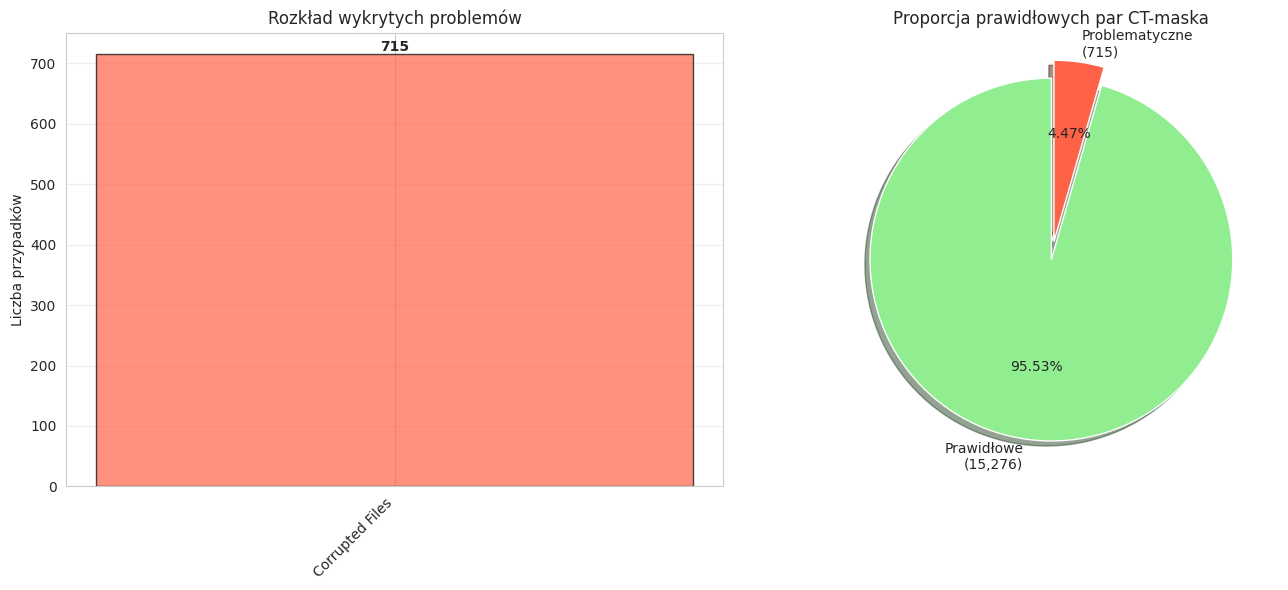


WNIOSKI I REKOMENDACJE

⚠️  Dataset ma umiarkowane problemy (4.47%)
💡 Zalecana inspekcja i ewentualna naprawa przed treningiem

⚠️  Uszkodzone pliki: 715
   → Usuń i przegeneruj te pliki

PODSUMOWANIE: 15276/15991 par gotowych do użycia


In [29]:
# Sanity checks - spójność danych, pary CT-maska, problemy techniczne
print("="*70)
print("SEKCJA 9: SANITY CHECKS - SPÓJNOŚĆ DANYCH")
print("="*70)

sanity_issues = {
    'missing_mask': [],
    'missing_ct': [],
    'empty_mask': [],
    'zero_variance_ct': [],
    'corrupted_files': [],
    'mismatched_shapes': []
}

total_checked = 0
valid_pairs = 0

print("\nSprawdzanie spójności danych CT i masek...")

for patient_dir in patient_dirs:
    patient_name = patient_dir.name
    
    for category in categories:
        ct_dir = patient_dir / category / 'ct'
        mask_dir = patient_dir / category / 'mask'
        
        if not ct_dir.exists():
            continue
            
        ct_files = sorted(list(ct_dir.glob('*.npy')))
        
        for ct_file in ct_files:
            total_checked += 1
            slice_name = ct_file.name
            mask_file = mask_dir / slice_name if mask_dir.exists() else None
            
            # 1. Sprawdź czy istnieje maska
            if not mask_file or not mask_file.exists():
                sanity_issues['missing_mask'].append({
                    'patient': patient_name,
                    'category': category,
                    'slice': slice_name
                })
                continue
            
            try:
                # Wczytaj CT i maskę
                ct_scan = np.load(ct_file)
                mask = np.load(mask_file)
                
                # 2. Sprawdź czy kształty się zgadzają
                if ct_scan.shape != mask.shape:
                    sanity_issues['mismatched_shapes'].append({
                        'patient': patient_name,
                        'category': category,
                        'slice': slice_name,
                        'ct_shape': ct_scan.shape,
                        'mask_shape': mask.shape
                    })
                    continue
                
                # 3. Sprawdź czy maska nie jest całkowicie pusta (tylko tło = 0)
                unique_values = np.unique(mask)
                if len(unique_values) == 1 and unique_values[0] == 0:
                    # To jest prawidłowe dla kategorii background_only
                    if category != 'background_only':
                        sanity_issues['empty_mask'].append({
                            'patient': patient_name,
                            'category': category,
                            'slice': slice_name
                        })
                        continue
                
                # 4. Sprawdź zerową wariancję CT (wszystkie piksele identyczne)
                if ct_scan.std() < 0.01:
                    sanity_issues['zero_variance_ct'].append({
                        'patient': patient_name,
                        'category': category,
                        'slice': slice_name,
                        'std': ct_scan.std()
                    })
                    continue
                
                # Para CT-maska jest prawidłowa
                valid_pairs += 1
                
            except (EOFError, ValueError, OSError) as e:
                sanity_issues['corrupted_files'].append({
                    'patient': patient_name,
                    'category': category,
                    'slice': slice_name,
                    'error': str(e)
                })
                continue

# Sprawdź czy są maski bez CT (rzadkie, ale możliwe)
for patient_dir in patient_dirs:
    patient_name = patient_dir.name
    
    for category in categories:
        mask_dir = patient_dir / category / 'mask'
        ct_dir = patient_dir / category / 'ct'
        
        if not mask_dir.exists():
            continue
            
        mask_files = sorted(list(mask_dir.glob('*.npy')))
        
        for mask_file in mask_files:
            slice_name = mask_file.name
            ct_file = ct_dir / slice_name if ct_dir.exists() else None
            
            if not ct_file or not ct_file.exists():
                sanity_issues['missing_ct'].append({
                    'patient': patient_name,
                    'category': category,
                    'slice': slice_name
                })

# Podsumowanie
print("\n" + "="*70)
print("WYNIKI SANITY CHECKS")
print("="*70)

print(f"\n✓ Sprawdzono {total_checked:,} par CT-maska")
print(f"✓ Prawidłowych par: {valid_pairs:,} ({valid_pairs/total_checked*100:.2f}%)")

problematic = total_checked - valid_pairs
if problematic > 0:
    print(f"\n⚠️  WYKRYTO {problematic} PROBLEMATYCZNYCH PAR ({problematic/total_checked*100:.2f}%)")
else:
    print(f"\n✓ WSZYSTKIE PARY SĄ PRAWIDŁOWE!")

# Raport szczegółowy
print("\n" + "-"*70)
print("SZCZEGÓŁOWY RAPORT PROBLEMÓW")
print("-"*70)

for issue_type, issues_list in sanity_issues.items():
    count = len(issues_list)
    
    if count > 0:
        print(f"\n⚠️  {issue_type.upper().replace('_', ' ')}: {count} przypadków")
        
        if count <= 5:
            # Pokaż wszystkie jeśli mało
            for issue in issues_list:
                print(f"   - {issue['patient']}/{issue['category']}/{issue['slice']}")
                if 'error' in issue:
                    print(f"     Błąd: {issue['error']}")
                if 'ct_shape' in issue:
                    print(f"     CT: {issue['ct_shape']}, Maska: {issue['mask_shape']}")
        else:
            # Pokaż tylko pierwsze 3 przykłady
            for issue in issues_list[:3]:
                print(f"   - {issue['patient']}/{issue['category']}/{issue['slice']}")
            print(f"   ... i {count - 3} innych")
    else:
        print(f"\n✓ {issue_type.upper().replace('_', ' ')}: Brak problemów")

# Wizualizacja rozkładu problemów
if problematic > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Wykres słupkowy problemów
    issue_counts = {k.replace('_', ' ').title(): len(v) 
                    for k, v in sanity_issues.items() if len(v) > 0}
    
    if issue_counts:
        axes[0].bar(range(len(issue_counts)), list(issue_counts.values()), 
                   color='tomato', edgecolor='black', alpha=0.7)
        axes[0].set_xticks(range(len(issue_counts)))
        axes[0].set_xticklabels(list(issue_counts.keys()), rotation=45, ha='right')
        axes[0].set_ylabel('Liczba przypadków')
        axes[0].set_title('Rozkład wykrytych problemów')
        axes[0].grid(axis='y', alpha=0.3)
        
        # Dodaj wartości
        for i, val in enumerate(issue_counts.values()):
            axes[0].text(i, val, str(val), ha='center', va='bottom', fontweight='bold')
    
    # Wykres kołowy: valid vs problematic
    labels = [f'Prawidłowe\n({valid_pairs:,})', f'Problematyczne\n({problematic:,})']
    sizes = [valid_pairs, problematic]
    colors = ['lightgreen', 'tomato']
    explode = (0, 0.1)
    
    axes[1].pie(sizes, explode=explode, labels=labels, colors=colors, 
               autopct='%1.2f%%', shadow=True, startangle=90)
    axes[1].set_title('Proporcja prawidłowych par CT-maska')
    
    plt.tight_layout()
    plt.show()

print("\n" + "="*70)
print("WNIOSKI I REKOMENDACJE")
print("="*70)

# Analiza i rekomendacje
if problematic == 0:
    print("\n✓ Dataset jest w pełni spójny - wszystkie pary CT-maska są prawidłowe")
    print("✓ Brak uszkodzonych plików")
    print("✓ Wszystkie kształty CT i masek są zgodne")
    print("\n💡 Dataset jest gotowy do treningu bez dodatkowych filtracji")
else:
    error_rate = problematic / total_checked * 100
    
    if error_rate < 1:
        print(f"\n✓ Dataset jest w dobrym stanie ({error_rate:.2f}% problemów)")
        print("💡 Nieliczne problemy można zignorować lub naprawić ręcznie")
    elif error_rate < 5:
        print(f"\n⚠️  Dataset ma umiarkowane problemy ({error_rate:.2f}%)")
        print("💡 Zalecana inspekcja i ewentualna naprawa przed treningiem")
    else:
        print(f"\n❌ Dataset ma znaczące problemy ({error_rate:.2f}%)")
        print("💡 Wymagana korekta danych przed treningiem!")
    
    # Specyficzne rekomendacje
    if len(sanity_issues['missing_mask']) > 0:
        print(f"\n⚠️  Brakujące maski: {len(sanity_issues['missing_mask'])}")
        print("   → Sprawdź proces generowania masek")
    
    if len(sanity_issues['corrupted_files']) > 0:
        print(f"\n⚠️  Uszkodzone pliki: {len(sanity_issues['corrupted_files'])}")
        print("   → Usuń i przegeneruj te pliki")
    
    if len(sanity_issues['mismatched_shapes']) > 0:
        print(f"\n⚠️  Niezgodne kształty: {len(sanity_issues['mismatched_shapes'])}")
        print("   → Sprawdź preprocessing - wszystkie obrazy powinny mieć ten sam rozmiar")
    
    if len(sanity_issues['empty_mask']) > 0:
        print(f"\n⚠️  Puste maski: {len(sanity_issues['empty_mask'])}")
        print("   → Sprawdź kategoryzację - czy te slice'y powinny mieć adnotacje")
    
    if len(sanity_issues['zero_variance_ct']) > 0:
        print(f"\n⚠️  CT o zerowej wariancji: {len(sanity_issues['zero_variance_ct'])}")
        print("   → Prawdopodobnie artefakty - rozważ usunięcie")

print("\n" + "="*70)
print(f"PODSUMOWANIE: {valid_pairs}/{total_checked} par gotowych do użycia")
print("="*70)

### Sekcja 10: Przykładowe przypadki (wizualizacja jakościowa)

SEKCJA 10: PRZYKŁADOWE PRZYPADKI - WIZUALIZACJA JAKOŚCIOWA

Wybrane przypadki:
1. person_4 - największy guz (objętość: 1516253 pikseli)
2. person_25 - najmniejszy guz (objętość: 454 pikseli)
3. person_25 - trudny przypadek (tylko 11 slice'ów z rakiem)

PRZYPADEK 1: PACJENT Z DUŻYM GUZEM


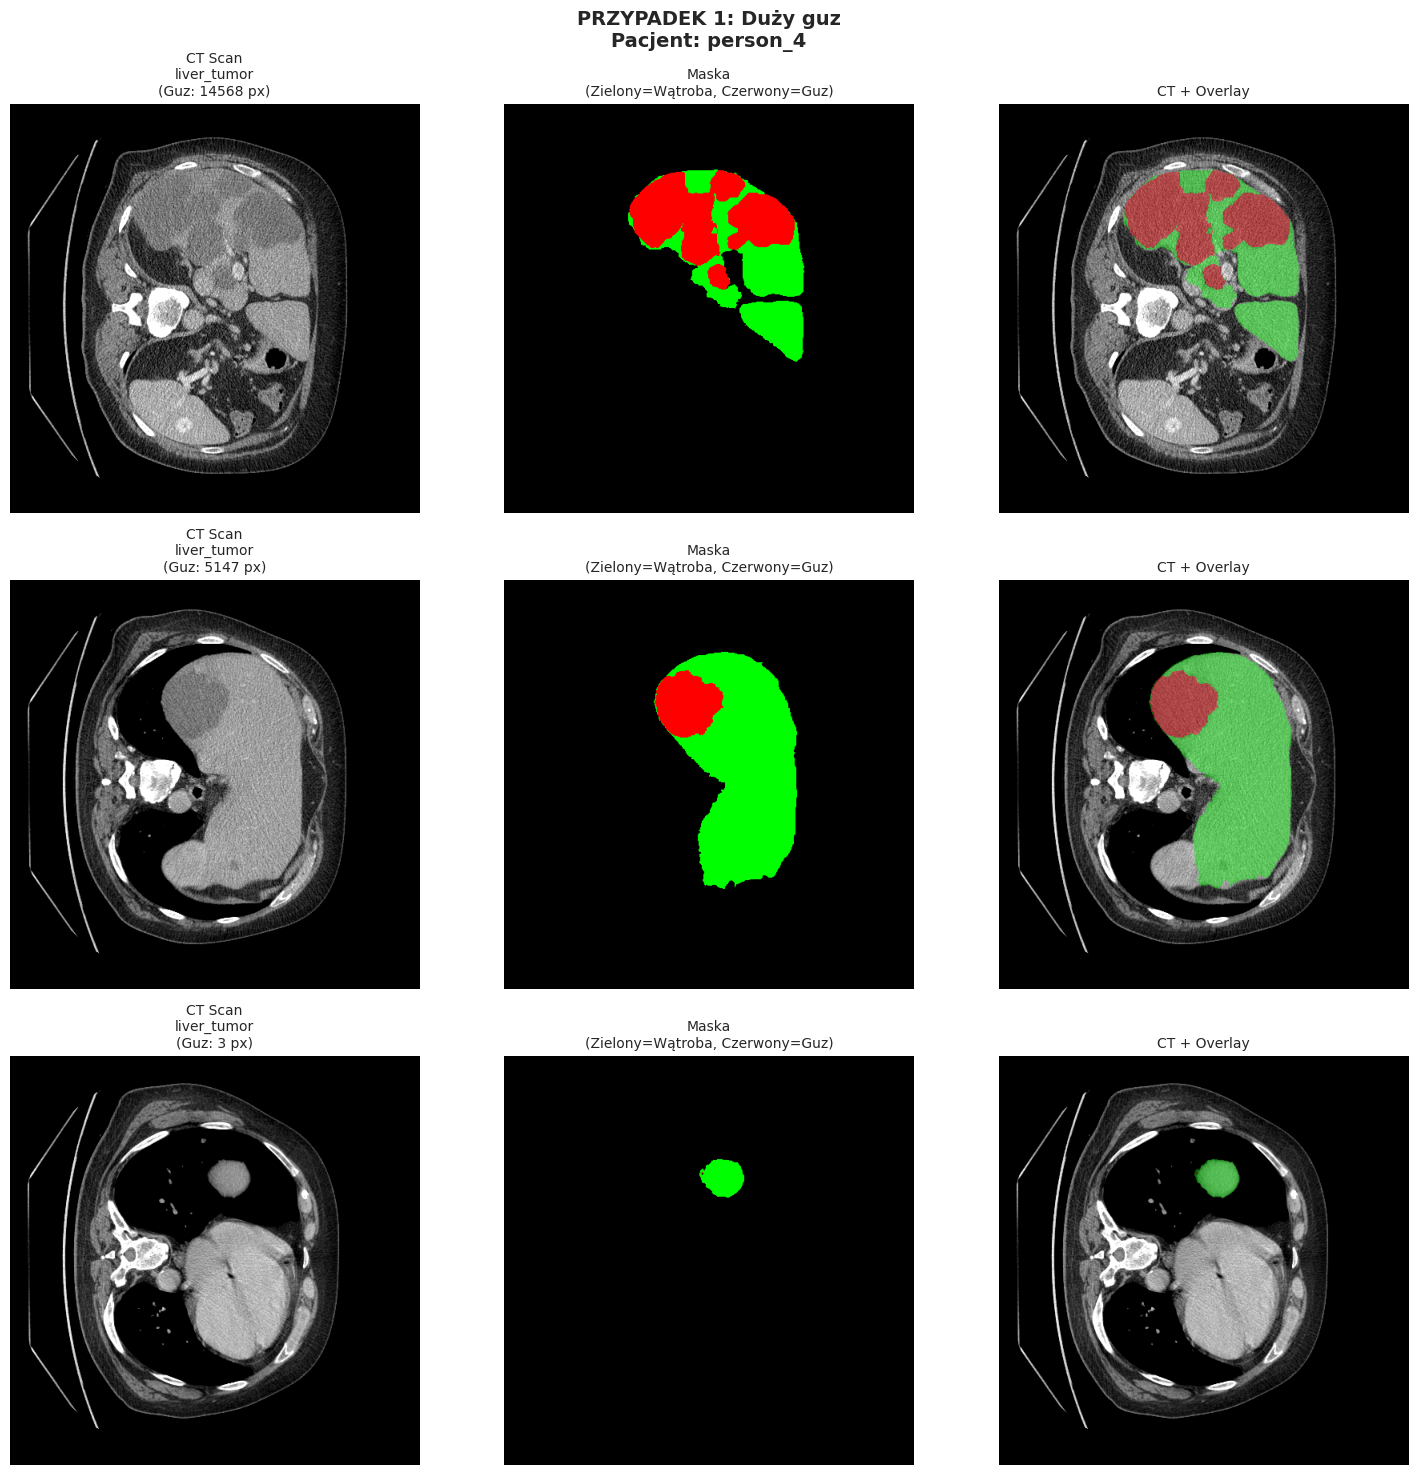


PRZYPADEK 2: PACJENT Z MAŁYM GUZEM


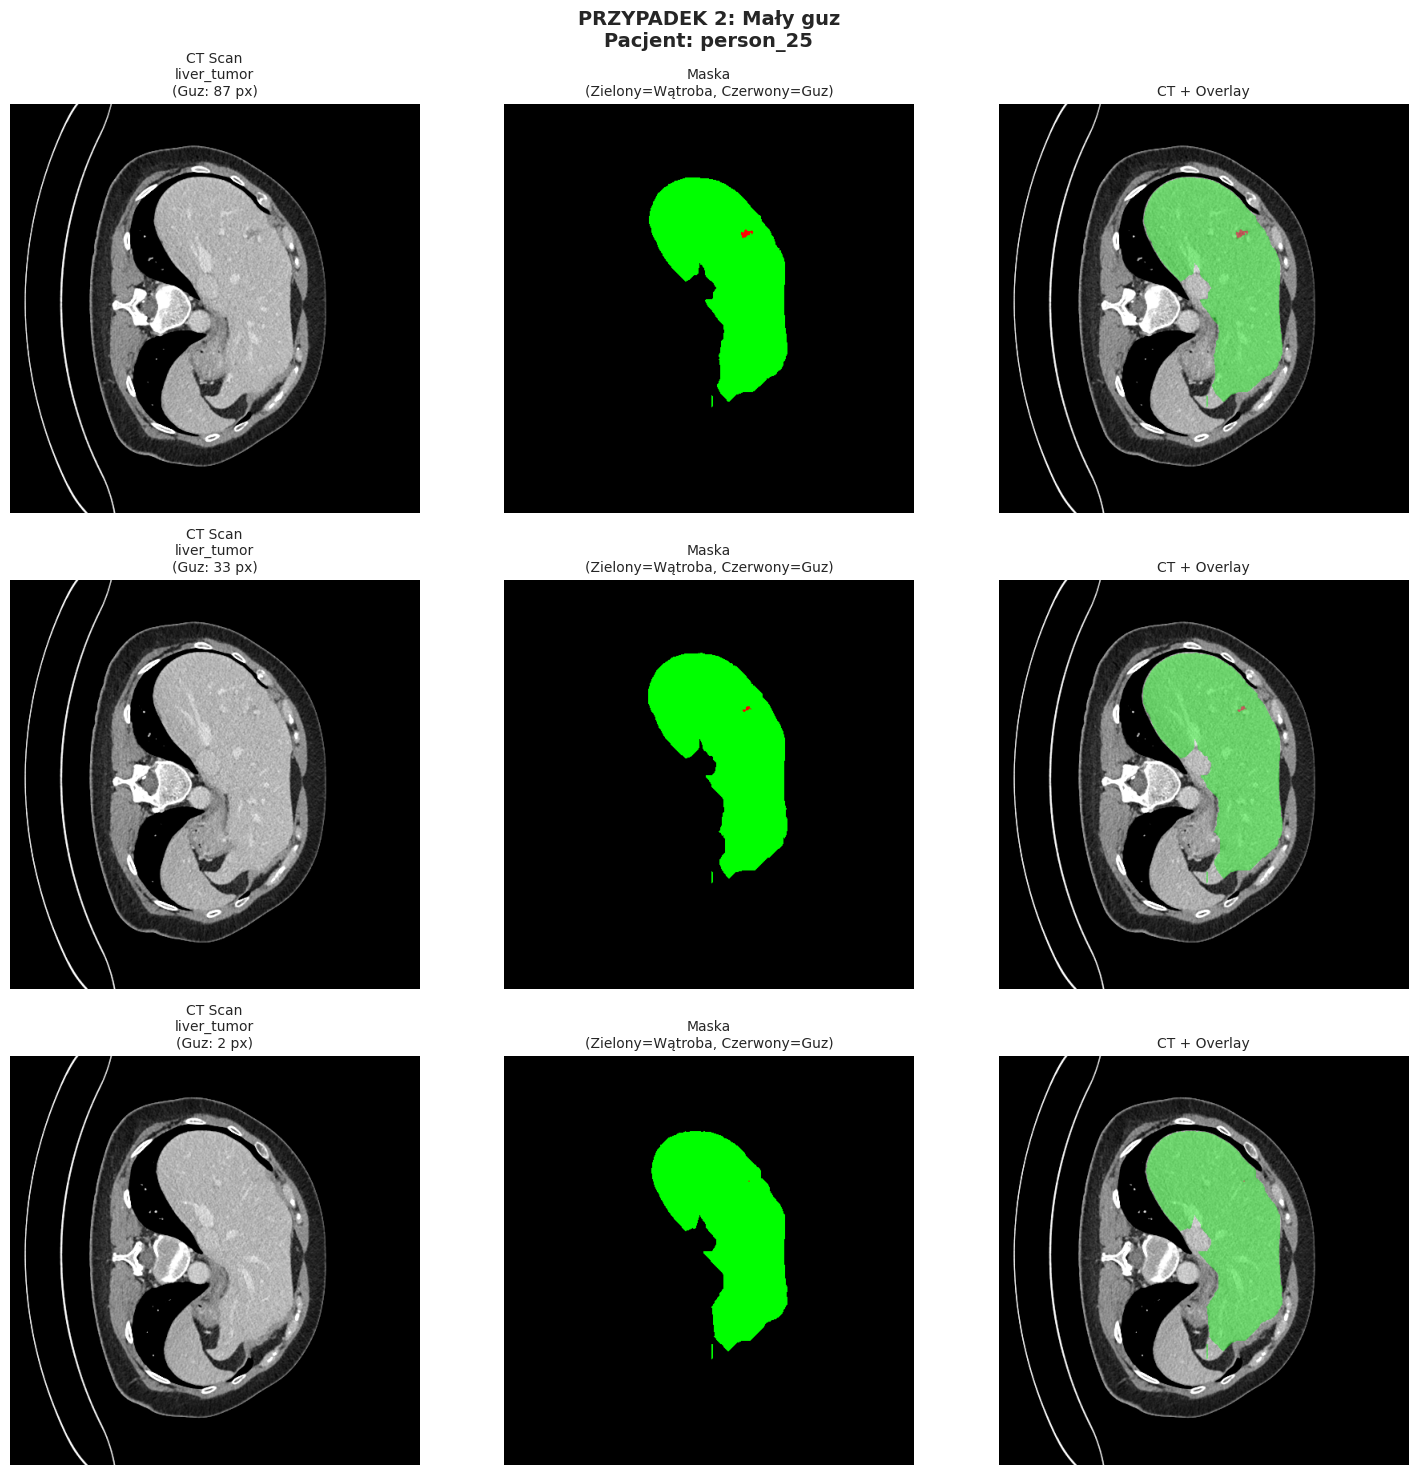


PRZYPADEK 3: PACJENT TRUDNY (MAŁO SLICE'ÓW Z RAKIEM)


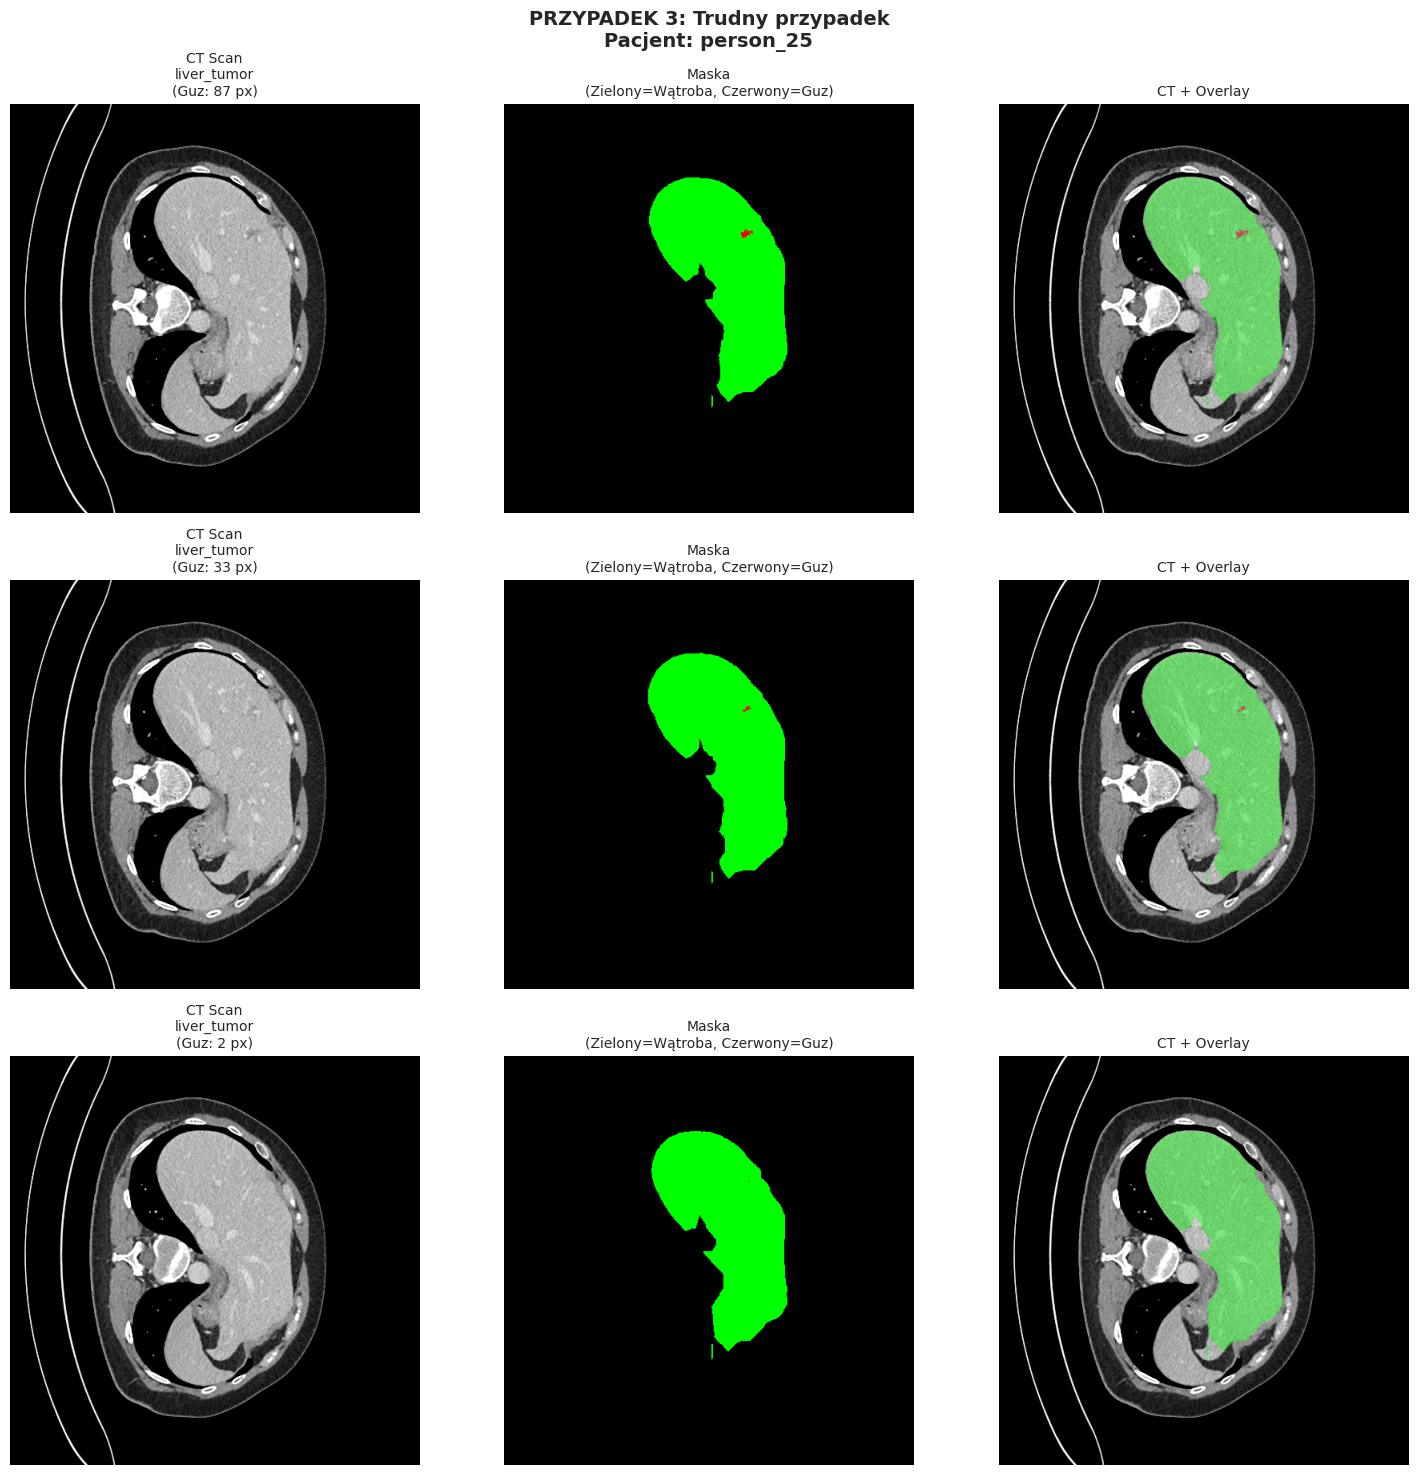


PODSUMOWANIE ANALIZY WIZUALNEJ

✓ Wizualizacja pokazuje różnorodność przypadków w zbiorze danych:
  - Duże guzy są wyraźnie widoczne i łatwe do wykrycia
  - Małe guzy wymagają uwagi modelu na detale
  - Trudne przypadki z małą liczbą slice'ów mogą być wyzwaniem dla generalizacji

💡 REKOMENDACJE:
  1. Augmentacje: rotacja, przesunięcie, flip dla zwiększenia różnorodności
  2. Focal Loss: dla małych guzów i nierówności klas
  3. Attention mechanisms: aby model skupił się na regionach guza
  4. Multi-scale: aby wykrywać zarówno duże jak i małe guzy


In [30]:
# Sekcja 10: Przykładowe przypadki (wizualizacja jakościowa)
print("="*70)
print("SEKCJA 10: PRZYKŁADOWE PRZYPADKI - WIZUALIZACJA JAKOŚCIOWA")
print("="*70)

# Wybierz 3 charakterystyczne przypadki:
# 1. Pacjent z dużym guzem (wysoka objętość)
# 2. Pacjent z małym guzem (niska objętość)
# 3. Pacjent trudny (mało slice'ów z rakiem)

case_1 = patient_tumor_volume.iloc[0]['patient']  # Największy guz
case_2 = patient_tumor_volume.iloc[-1]['patient']  # Najmniejszy guz
case_3 = top_10_lowest[top_10_lowest['with_cancer'] > 0].iloc[0]['patient']  # Trudny przypadek

print(f"\nWybrane przypadki:")
print(f"1. {case_1} - największy guz (objętość: {patient_tumor_volume.iloc[0]['total_tumor_volume']:.0f} pikseli)")
print(f"2. {case_2} - najmniejszy guz (objętość: {patient_tumor_volume.iloc[-1]['total_tumor_volume']:.0f} pikseli)")
print(f"3. {case_3} - trudny przypadek (tylko {df[df['patient'] == case_3]['with_cancer'].values[0]} slice'ów z rakiem)")

def visualize_representative_cases(patient_name, num_slices=3, case_description=""):
    """Wizualizuje reprezentatywne slice'y dla danego pacjenta"""
    patient_dir = prepared_data_dir / patient_name
    
    # Zbierz slice'y z guzem
    tumor_slices = []
    for category in ['liver_tumor', 'tumor']:
        ct_dir = patient_dir / category / 'ct'
        mask_dir = patient_dir / category / 'mask'
        
        if ct_dir.exists() and mask_dir.exists():
            ct_files = sorted(list(ct_dir.glob('*.npy')))
            
            for ct_file in ct_files:
                mask_file = mask_dir / ct_file.name
                
                if mask_file.exists():
                    try:
                        mask = np.load(mask_file)
                        tumor_coverage = np.sum(mask == 2)
                        
                        tumor_slices.append({
                            'category': category,
                            'ct_path': ct_file,
                            'mask_path': mask_file,
                            'tumor_coverage': tumor_coverage
                        })
                    except (EOFError, ValueError):
                        continue
    
    if len(tumor_slices) == 0:
        print(f"⚠️  Brak slice'ów z guzem dla {patient_name}")
        return
    
    # Sortuj po pokryciu guza i wybierz reprezentatywne
    tumor_slices.sort(key=lambda x: x['tumor_coverage'], reverse=True)
    
    # Wybierz: największy, średni, najmniejszy (jeśli dostępne)
    n_available = len(tumor_slices)
    if n_available >= 3:
        selected_indices = [0, n_available // 2, n_available - 1]
    elif n_available == 2:
        selected_indices = [0, 1]
    else:
        selected_indices = [0]
    
    selected_slices = [tumor_slices[i] for i in selected_indices]
    n_display = len(selected_slices)
    
    # Wizualizacja
    fig, axes = plt.subplots(n_display, 3, figsize=(15, 5*n_display))
    
    if n_display == 1:
        axes = axes.reshape(1, -1)
    
    for idx, sample in enumerate(selected_slices):
        try:
            # Wczytaj dane
            ct_scan = np.load(sample['ct_path'])
            mask = np.load(sample['mask_path'])
            
            # 1. CT scan
            axes[idx, 0].imshow(ct_scan, cmap='gray', vmin=-160, vmax=240)
            axes[idx, 0].set_title(f"CT Scan\n{sample['category']}\n(Guz: {sample['tumor_coverage']} px)", fontsize=10)
            axes[idx, 0].axis('off')
            
            # 2. Maska (wątroba=1, guz=2)
            mask_colored = np.zeros((*mask.shape, 3))
            mask_colored[mask == 1] = [0, 1, 0]  # Zielony - wątroba
            mask_colored[mask == 2] = [1, 0, 0]  # Czerwony - guz
            
            axes[idx, 1].imshow(mask_colored)
            axes[idx, 1].set_title(f"Maska\n(Zielony=Wątroba, Czerwony=Guz)", fontsize=10)
            axes[idx, 1].axis('off')
            
            # 3. Overlay CT + maska
            # Normalizuj CT do [0, 1]
            ct_normalized = np.clip(ct_scan, -160, 240)
            ct_normalized = (ct_normalized - ct_normalized.min()) / (ct_normalized.max() - ct_normalized.min())
            overlay = np.stack([ct_normalized, ct_normalized, ct_normalized], axis=-1)
            
            # Dodaj kolory masek z przezroczystością
            alpha = 0.4
            overlay[mask == 1] = overlay[mask == 1] * (1-alpha) + np.array([0, 1, 0]) * alpha
            overlay[mask == 2] = overlay[mask == 2] * (1-alpha) + np.array([1, 0, 0]) * alpha
            
            axes[idx, 2].imshow(overlay)
            axes[idx, 2].set_title(f"CT + Overlay", fontsize=10)
            axes[idx, 2].axis('off')
            
        except (EOFError, ValueError) as e:
            print(f"⚠️  Błąd ładowania: {sample['ct_path'].name}")
            continue
    
    fig.suptitle(f'{case_description}\nPacjent: {patient_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Wizualizuj 3 przypadki
print("\n" + "="*70)
print("PRZYPADEK 1: PACJENT Z DUŻYM GUZEM")
print("="*70)
visualize_representative_cases(case_1, case_description="PRZYPADEK 1: Duży guz")

print("\n" + "="*70)
print("PRZYPADEK 2: PACJENT Z MAŁYM GUZEM")
print("="*70)
visualize_representative_cases(case_2, case_description="PRZYPADEK 2: Mały guz")

print("\n" + "="*70)
print("PRZYPADEK 3: PACJENT TRUDNY (MAŁO SLICE'ÓW Z RAKIEM)")
print("="*70)
visualize_representative_cases(case_3, case_description="PRZYPADEK 3: Trudny przypadek")

# Podsumowanie końcowe
print("\n" + "="*70)
print("PODSUMOWANIE ANALIZY WIZUALNEJ")
print("="*70)
print(f"\n✓ Wizualizacja pokazuje różnorodność przypadków w zbiorze danych:")
print(f"  - Duże guzy są wyraźnie widoczne i łatwe do wykrycia")
print(f"  - Małe guzy wymagają uwagi modelu na detale")
print(f"  - Trudne przypadki z małą liczbą slice'ów mogą być wyzwaniem dla generalizacji")
print(f"\n💡 REKOMENDACJE:")
print(f"  1. Augmentacje: rotacja, przesunięcie, flip dla zwiększenia różnorodności")
print(f"  2. Focal Loss: dla małych guzów i nierówności klas")
print(f"  3. Attention mechanisms: aby model skupił się na regionach guza")
print(f"  4. Multi-scale: aby wykrywać zarówno duże jak i małe guzy")
print("="*70)